## Supplementing the statistics results

In [160]:
import reframed
import pandas as pd

from reframed.cobra import auxotrophy

In [161]:
import sys
sys.path.append("../functions/")
import general_functions as general_func

import colors_MAGs as color_func

In [162]:
from sklearn.metrics.pairwise import pairwise_distances
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc
import seaborn as sns

## Read data 

In [163]:
all_mag_paper = general_func.read_allmags_data()

In [164]:
MAG2community_id = pd.read_csv("../output/MAG2community_id.tsv",sep="\t",header=None)
MAG2community_id.columns=["MAG","community"]
MAG2community_id = MAG2community_id[MAG2community_id["MAG"].isin(all_mag_paper[all_mag_paper.new_coverage>1].index)].copy()
MAG2community_id

,MAG,community
0,CH13-bin.12,CD_A
1,CH13-bin.11,CD_A
2,CH13-bin.4,CD_A
3,CH13-bin.14,CD_A
4,CH13-bin.25,CD_A
...,...,...
92,CH1-bin.1,M_P
93,CH1-bin.10,M_P
98,CH3-bin.2,M_X
99,CH3-bin.1,M_X


**Media**

In [165]:
media_db = pd.read_csv("https://raw.githubusercontent.com/cdanielmachado/carveme/master/carveme/data/input/media_db.tsv",sep="\t")
m9_env_db = media_db[media_db.medium=="M9[-O2]"]
m9_env = reframed.Environment.from_compounds(m9_env_db.compound.values)


lb_db = media_db[media_db.medium=="LB[-O2]"]

**Colors**

In [166]:
cazy_lut,unique_numbers,cazy_colors = color_func.cazy_colors_func()

phyla_lut, unique_phyla, phylum_colors = color_func.phylum_colors_func()

chebi_lut,chebi_interesting,chebi_colors_ser = color_func.chebi_rxn_color_func()

In [167]:
colrs_df = pd.concat([cazy_colors,phylum_colors],axis=1)


In [168]:
colrs_df

,CAZy,Phylum
CH1-bin.0,"(1.0, 1.0, 1.0)",NaN
CH1-bin.1,"(1.0, 1.0, 1.0)",#f2f200
CH1-bin.10,"(1.0, 1.0, 1.0)",#744700
CH1-bin.2,"(0.04359861591695502, 0.4648212226066897, 0.20...",NaN
CH1-bin.3,"(0.04359861591695502, 0.4648212226066897, 0.20...",#0000f2
...,...,...
CH9-bin.2,"(0.21568627450980393, 0.6287581699346405, 0.33...",#27b400
CH9-bin.4,"(0.21568627450980393, 0.6287581699346405, 0.33...",#27b400
CH9-bin.5,"(0.681045751633987, 0.8718954248366013, 0.6562...",#27b400
CH9-bin.6,"(0.45176470588235296, 0.7670895809304115, 0.46...",#27b400


### Load models

In [169]:
GEMs_dict = {}

for MAG in MAG2community_id["MAG"].values:
    
    GEMs_dict[MAG]=reframed.load_cbmodel("../output/GEMs/GEMs_final/"+MAG+".xml", flavor="bigg")

In [170]:
GEMs_dict_old = {}

for MAG in MAG2community_id["MAG"].values:
    
    GEMs_dict_old[MAG]=reframed.load_cbmodel("../output/GEMs/GEMs_intermediate/GEMs_adapt/"+MAG+".xml", flavor="bigg")

## 0. General results

### Auxotrophies

In [171]:
all_gems_auxo={}

lb_env = reframed.Environment.from_compounds(lb_db.compound.values)

for MAG in GEMs_dict.keys():
    model = GEMs_dict[MAG]
    
    lb_env.apply(model,inplace=True,warning=False)
    specific_env = reframed.Environment.from_model(model)
    
    auxo = auxotrophy.auxotrophies(model,specific_env)
    
    all_gems_auxo[MAG]=auxo

In [172]:
all_gems_auxo

{'CH13-bin.12': ['R_EX_ca2_e',
  'R_EX_cl_e',
  'R_EX_cobalt2_e',
  'R_EX_cu2_e',
  'R_EX_fe3_e',
  'R_EX_glc__D_e',
  'R_EX_k_e',
  'R_EX_mg2_e',
  'R_EX_mn2_e',
  'R_EX_pi_e',
  'R_EX_so4_e',
  'R_EX_ura_e',
  'R_EX_zn2_e'],
 'CH13-bin.11': ['R_EX_ca2_e',
  'R_EX_cl_e',
  'R_EX_cobalt2_e',
  'R_EX_cu2_e',
  'R_EX_k_e',
  'R_EX_mg2_e',
  'R_EX_mn2_e',
  'R_EX_pi_e',
  'R_EX_so4_e',
  'R_EX_zn2_e'],
 'CH13-bin.4': ['R_EX_ca2_e',
  'R_EX_cl_e',
  'R_EX_cobalt2_e',
  'R_EX_cu2_e',
  'R_EX_fe2_e',
  'R_EX_k_e',
  'R_EX_mg2_e',
  'R_EX_mn2_e',
  'R_EX_pi_e',
  'R_EX_so4_e',
  'R_EX_zn2_e'],
 'CH13-bin.14': ['R_EX_ca2_e',
  'R_EX_cl_e',
  'R_EX_cobalt2_e',
  'R_EX_cu2_e',
  'R_EX_fe3_e',
  'R_EX_k_e',
  'R_EX_mg2_e',
  'R_EX_mn2_e',
  'R_EX_nac_e',
  'R_EX_pi_e',
  'R_EX_pnto__R_e',
  'R_EX_so4_e',
  'R_EX_ura_e',
  'R_EX_zn2_e'],
 'CH13-bin.25': ['R_EX_ca2_e',
  'R_EX_cl_e',
  'R_EX_cobalt2_e',
  'R_EX_cu2_e',
  'R_EX_fe3_e',
  'R_EX_k_e',
  'R_EX_mg2_e',
  'R_EX_mn2_e',
  'R_EX_nac_e',
  

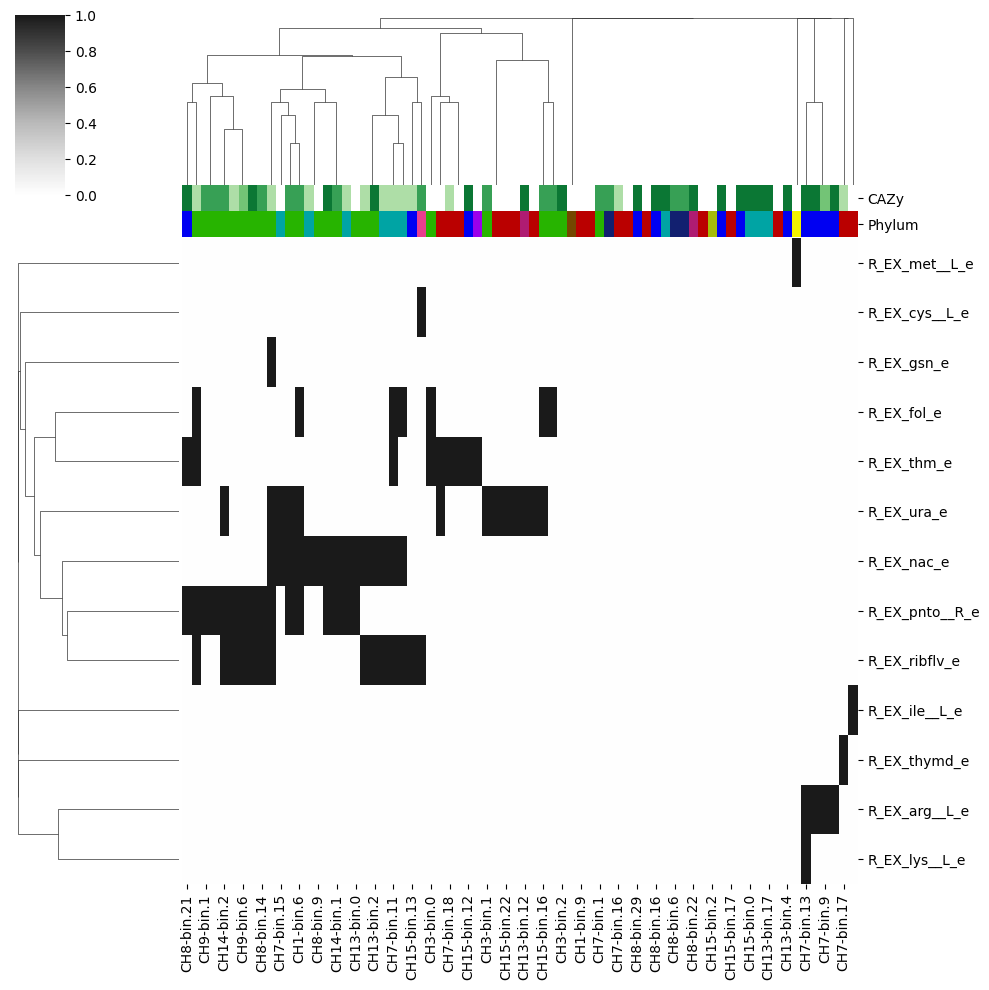

In [173]:
summary_auxo = {}

for key,value in all_gems_auxo.items():
    summary_auxo[key]={}
    for rxn in value:
        summary_auxo[key][rxn]=1
summary_auxo_df = pd.DataFrame(summary_auxo).fillna(0)
summary_auxo_df = summary_auxo_df.loc[~summary_auxo_df.index.isin(["R_EX_"+met+"_e" for met in m9_env_db.compound.values])]
#summary_auxo_df = summary_auxo_df.loc[:,summary_auxo_df.sum()>0]

sns.clustermap(data=summary_auxo_df, 
               cmap="RdGy",
               center=0,
               method="average",
               metric="jaccard",
               col_colors=colrs_df,
               z_score=None,
               standard_scale=None,
               yticklabels=True)

In [174]:
summary_auxo_df["CH13-bin.1"]

R_EX_ura_e        1.0
R_EX_nac_e        0.0
R_EX_pnto__R_e    0.0
R_EX_ribflv_e     0.0
R_EX_fol_e        0.0
R_EX_thm_e        0.0
R_EX_gsn_e        0.0
R_EX_arg__L_e     0.0
R_EX_lys__L_e     0.0
R_EX_thymd_e      0.0
R_EX_ile__L_e     0.0
R_EX_cys__L_e     0.0
R_EX_met__L_e     0.0
Name: CH13-bin.1, dtype: float64

### Minimal medium

In [175]:
all_GEMs_minimal_medium={}
n_solutions = 50

lb_env = reframed.Environment.from_compounds(media_db.compound.values)

for MAG in GEMs_dict.keys():

    model = GEMs_dict[MAG].copy()
    all_ex_rxns = list(lb_env.keys())                     
    ex_rxns =  [ex_rxn for ex_rxn in all_ex_rxns if ex_rxn in model.reactions]

    min_medium = reframed.cobra.medium.minimal_medium(model=model,exchange_reactions=ex_rxns,use_pool=True,n_solutions=n_solutions)
    
    all_GEMs_minimal_medium[MAG]=min_medium

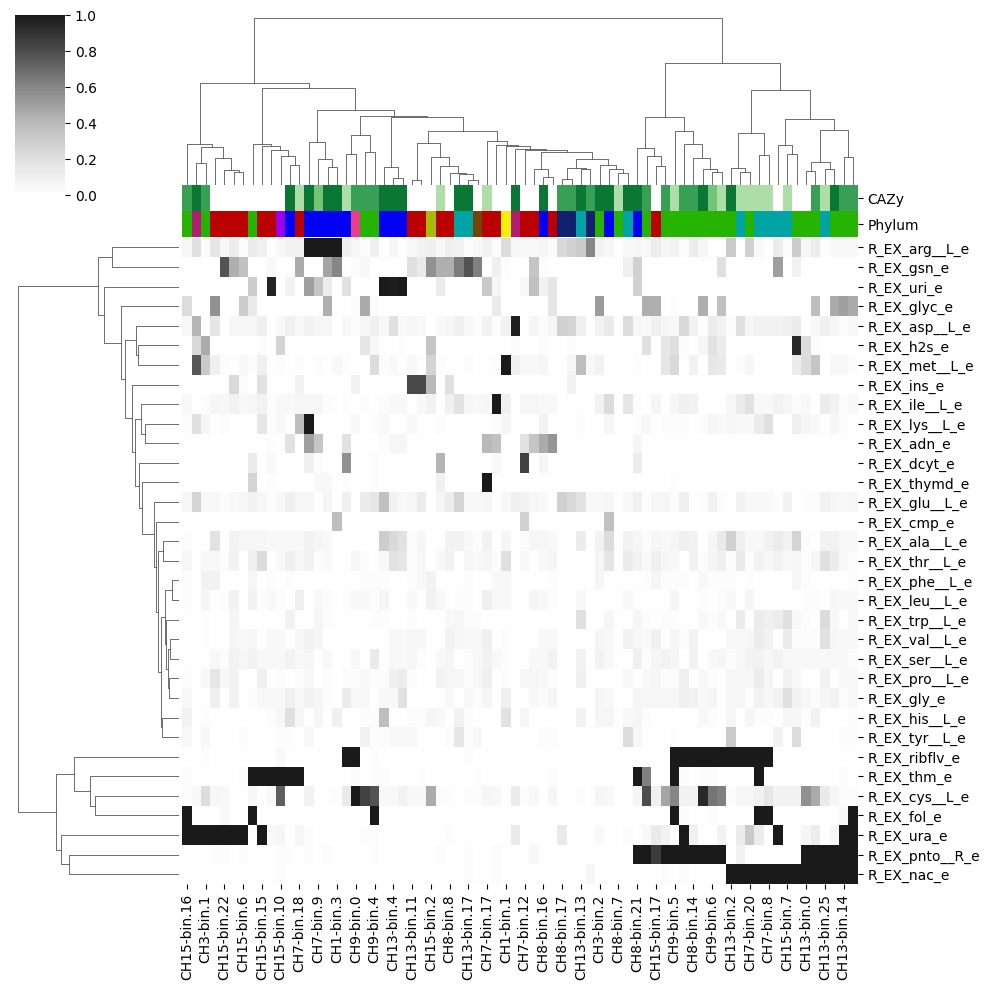

In [176]:
summary = {}
for key, value in all_GEMs_minimal_medium.items():
    
    solutions = value[0]
    summary[key]={}
    for solution in solutions:
        
        for element in solution:
            if element in summary[key].keys():
                summary[key][element] +=1
            else:
                summary[key][element] = 1

summary_df = pd.DataFrame(summary).fillna(0).apply(lambda x:x/n_solutions)
summary_df = summary_df.loc[~(summary_df.index.isin(m9_env.keys())) & (summary_df.sum(axis=1)>1)]


sns.clustermap(data=summary_df,
               cmap="RdGy",
               center=0,
               method="ward",
               metric="euclidean",
               col_colors=colrs_df,
               yticklabels=True)

### Compound producers

In [177]:
special_compounds = list(set(lb_db.compound.values) - set(m9_env_db.compound.values))

In [178]:
special_compounds.append("orn__L")
special_compounds.append("thym")
special_compounds.append("lac__L")
special_compounds.append("mal__L")
special_compounds.append("ppa")
special_compounds.append("2mpa")
special_compounds.append("but")
special_compounds.append("hxa")


In [179]:
m9_env = reframed.Environment.from_compounds(m9_env_db.compound.values)

compound_producer = {}

for MAG in GEMs_dict.keys():
    print(MAG)
    compound_producer[MAG]={}
    model = GEMs_dict[MAG].copy()
    m9_env.apply(model,inplace=True,warning=False)
    
    for compound in special_compounds:
        if "R_EX_"+compound+"_e" in model.reactions:
            sol = reframed.FBA(model,objective={"R_EX_"+compound+"_e":1,"R_Growth":0})
            compound_producer[MAG][compound] = sol.fobj>1e-6
        else:
            compound_producer[MAG][compound]=False

CH13-bin.12
CH13-bin.11
CH13-bin.4
CH13-bin.14
CH13-bin.25
CH13-bin.17
CH13-bin.0
CH13-bin.1
CH13-bin.13
CH13-bin.2
CH15-bin.0
CH15-bin.23
CH15-bin.1
CH15-bin.7
CH15-bin.8
CH15-bin.22
CH15-bin.6
CH15-bin.17
CH15-bin.16
CH15-bin.13
CH15-bin.12
CH15-bin.5
CH15-bin.10
CH15-bin.15
CH15-bin.2
CH14-bin.1
CH14-bin.2
CH14-bin.4
CH8-bin.22
CH8-bin.17
CH8-bin.7
CH8-bin.2
CH8-bin.6
CH8-bin.25
CH8-bin.5
CH8-bin.9
CH8-bin.16
CH8-bin.21
CH8-bin.8
CH8-bin.29
CH8-bin.14
CH7-bin.23
CH7-bin.16
CH7-bin.11
CH7-bin.13
CH7-bin.2
CH7-bin.8
CH7-bin.18
CH7-bin.1
CH7-bin.17
CH7-bin.4
CH7-bin.12
CH7-bin.20
CH7-bin.9
CH7-bin.6
CH7-bin.15
CH9-bin.0
CH9-bin.6
CH9-bin.5
CH9-bin.1
CH9-bin.2
CH9-bin.4
CH1-bin.6
CH1-bin.9
CH1-bin.3
CH1-bin.4
CH1-bin.8
CH1-bin.1
CH1-bin.10
CH3-bin.2
CH3-bin.1
CH3-bin.0


In [180]:
compound_producer_df = pd.DataFrame(compound_producer)
compound_producer_df = compound_producer_df.loc[compound_producer_df.sum(axis=1)>0]

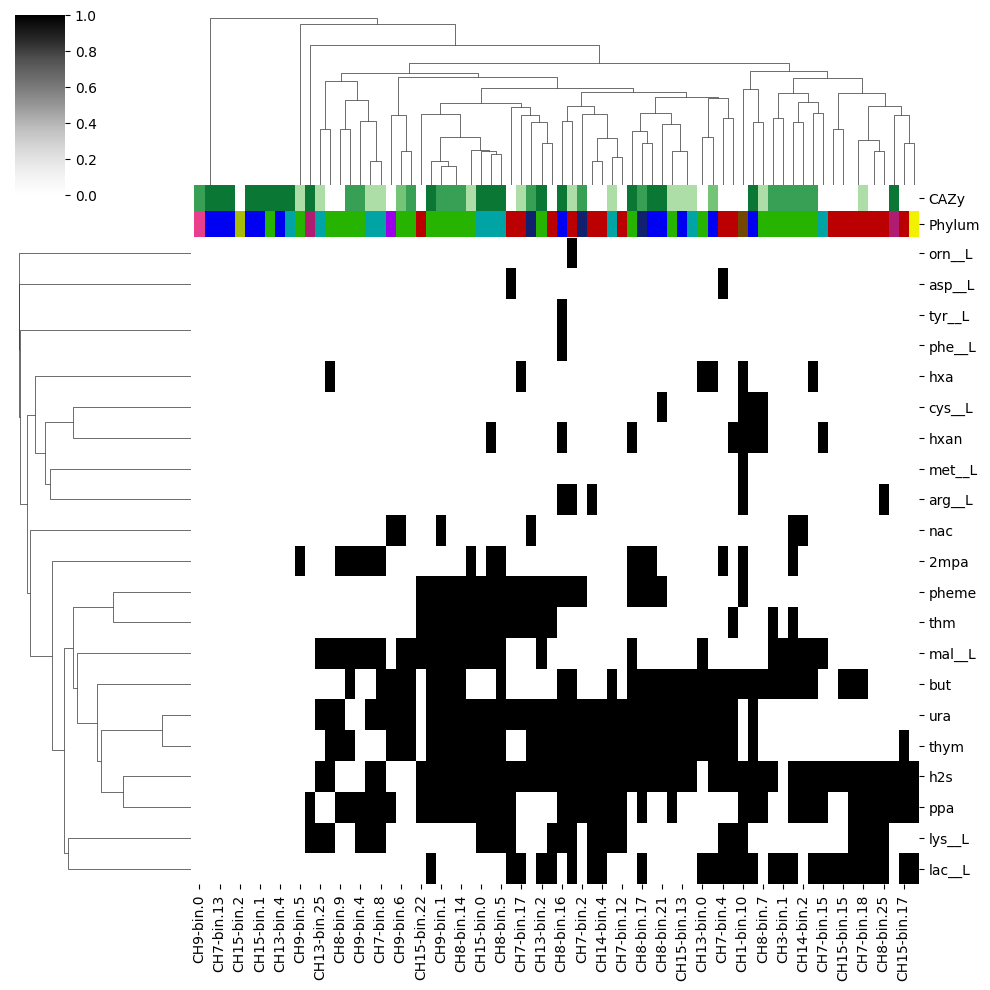

In [181]:
sns.clustermap(data=compound_producer_df, cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

#### Old models (before gapfilling)

In [182]:
m9_env = reframed.Environment.from_compounds(m9_env_db.compound.values)

compound_producer_old = {}

for MAG in GEMs_dict_old.keys():
    print(MAG)
    compound_producer_old[MAG]={}
    model = GEMs_dict_old[MAG].copy()
    m9_env.apply(model,inplace=True,warning=False)
    
    for compound in special_compounds:
        if "R_EX_"+compound+"_e" in model.reactions:
            sol = reframed.FBA(model,objective={"R_EX_"+compound+"_e":1,"R_Growth":0})
            compound_producer_old[MAG][compound] = sol.fobj>1e-6
        else:
            compound_producer_old[MAG][compound]=False

CH13-bin.12
CH13-bin.11
CH13-bin.4
CH13-bin.14
CH13-bin.25
CH13-bin.17
CH13-bin.0
CH13-bin.1
CH13-bin.13
CH13-bin.2
CH15-bin.0
CH15-bin.23
CH15-bin.1
CH15-bin.7
CH15-bin.8
CH15-bin.22
CH15-bin.6
CH15-bin.17
CH15-bin.16
CH15-bin.13
CH15-bin.12
CH15-bin.5
CH15-bin.10
CH15-bin.15
CH15-bin.2
CH14-bin.1
CH14-bin.2
CH14-bin.4
CH8-bin.22
CH8-bin.17
CH8-bin.7
CH8-bin.2
CH8-bin.6
CH8-bin.25
CH8-bin.5
CH8-bin.9
CH8-bin.16
CH8-bin.21
CH8-bin.8
CH8-bin.29
CH8-bin.14
CH7-bin.23
CH7-bin.16
CH7-bin.11
CH7-bin.13
CH7-bin.2
CH7-bin.8
CH7-bin.18
CH7-bin.1
CH7-bin.17
CH7-bin.4
CH7-bin.12
CH7-bin.20
CH7-bin.9
CH7-bin.6
CH7-bin.15
CH9-bin.0
CH9-bin.6
CH9-bin.5
CH9-bin.1
CH9-bin.2
CH9-bin.4
CH1-bin.6
CH1-bin.9
CH1-bin.3
CH1-bin.4
CH1-bin.8
CH1-bin.1
CH1-bin.10
CH3-bin.2
CH3-bin.1
CH3-bin.0


In [183]:
compound_producer_old_df = pd.DataFrame(compound_producer_old)
compound_producer_old_df = compound_producer_old_df.loc[compound_producer_old_df.sum(axis=1)>0]

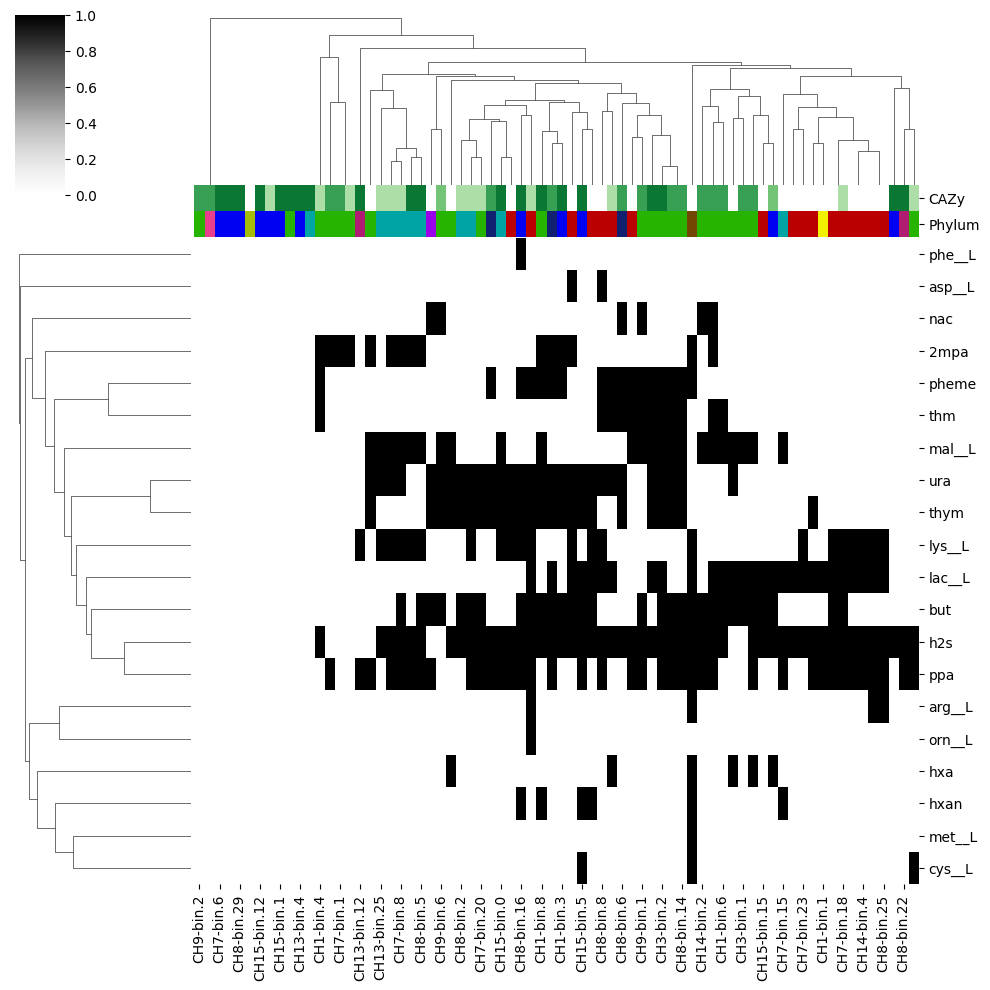

In [184]:
sns.clustermap(data=compound_producer_old_df, cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

### Steadiercom solutions

In [185]:
SC1_C = pd.read_csv("../output/steadiercom_sample_0.1.3/results/results_99_SC1_C.tsv",sep="\t")
SC2_C = pd.read_csv("../output/steadiercom_sample_0.1.3/results/results_99_SC2_C.tsv",sep="\t")
SC1_X = pd.read_csv("../output/steadiercom_sample_0.1.3/results/results_99_SC1_X.tsv",sep="\t")

steadier_sample = pd.concat([SC1_C,SC2_C,SC1_X])
steadier_sample = steadier_sample[(steadier_sample.frequency>0.1) & (steadier_sample.rate>1e-6)]
steadier_sample["mass_rate*frequency"] = steadier_sample["mass_rate"]*steadier_sample["frequency"]
steadier_sample_cross = steadier_sample[(steadier_sample.donor!="environment")&(steadier_sample.receiver!="environment")].copy()

In [186]:
steadiercom_receiver= steadier_sample_cross.groupby(["receiver","compound"]).mean()["mass_rate*frequency"].unstack().fillna(0).T
steadiercom_receiver = steadiercom_receiver[steadiercom_receiver.sum(axis=1)>1e-6].copy()

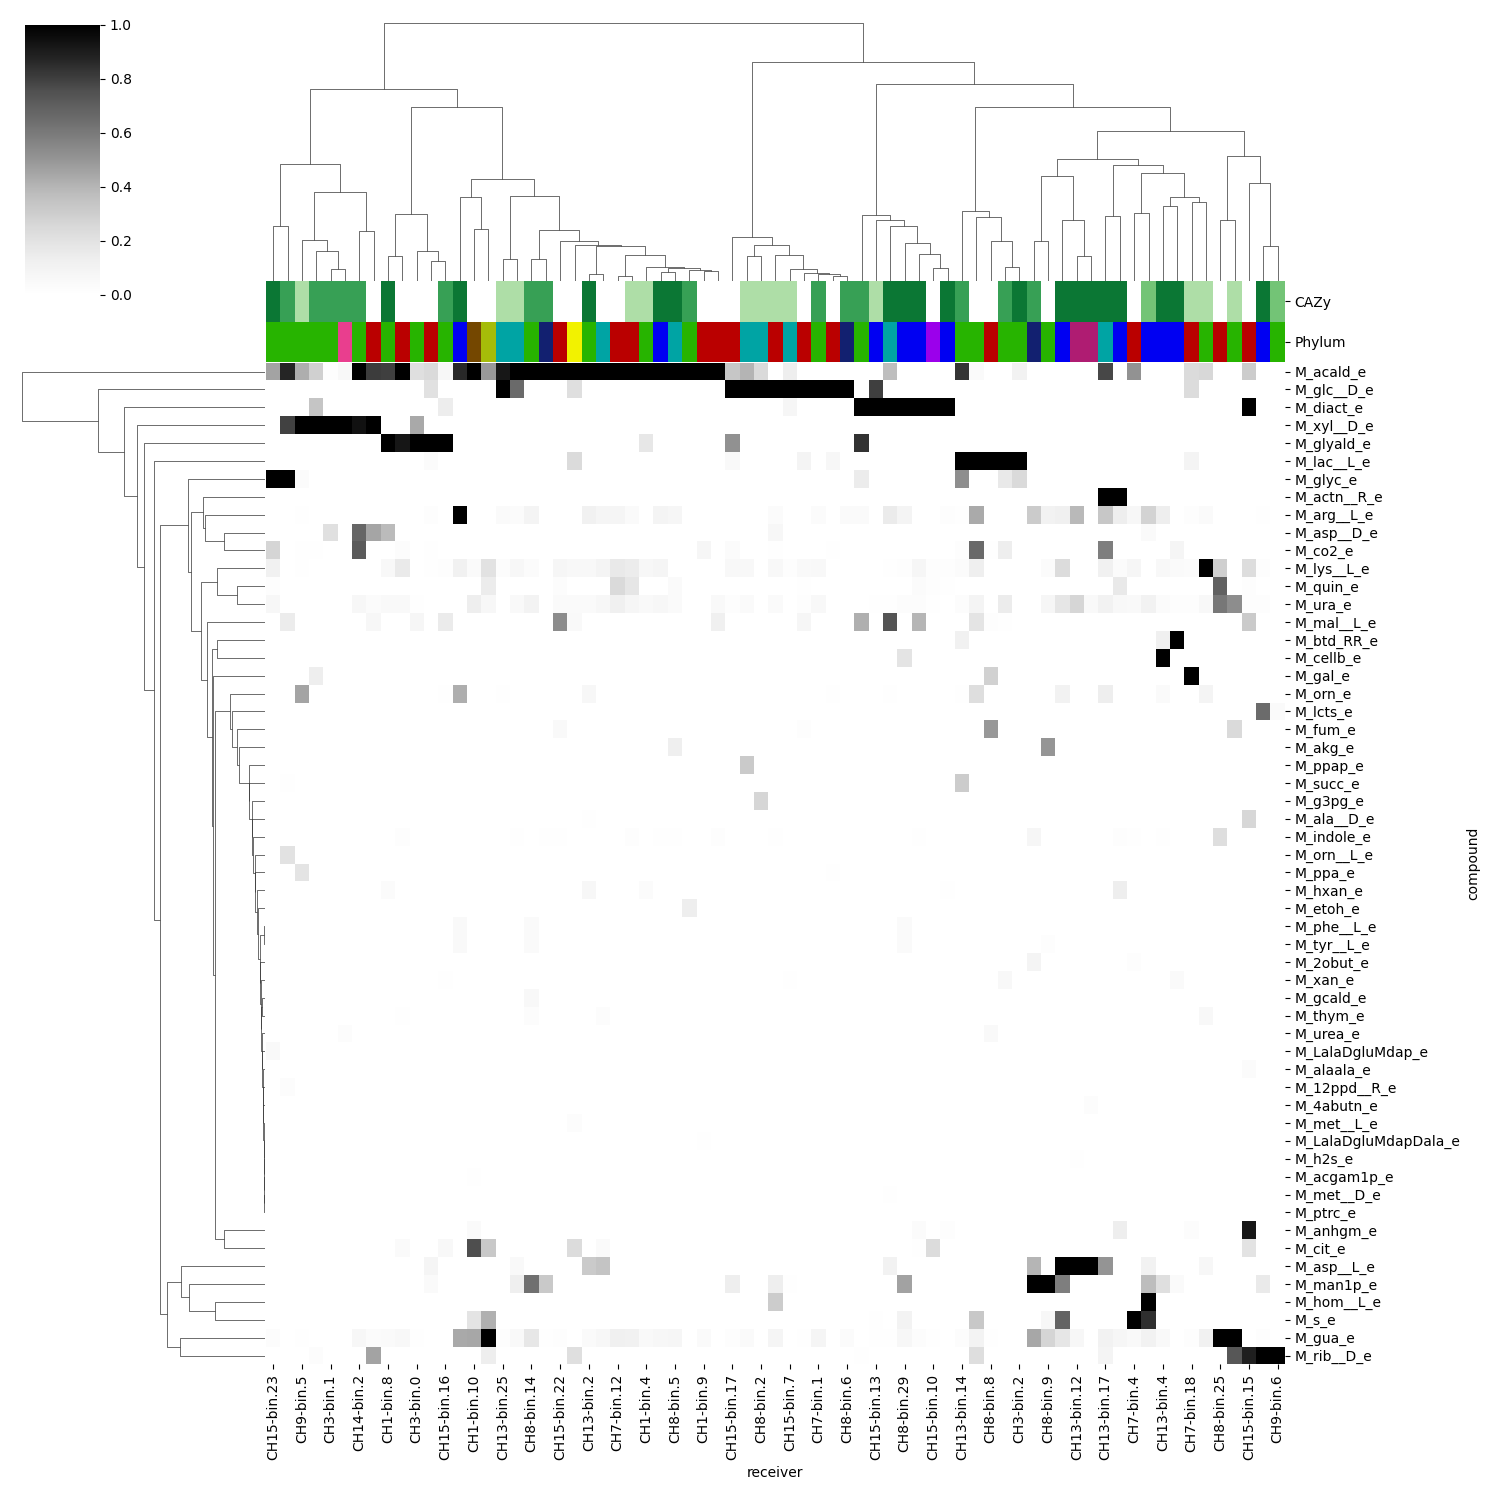

In [187]:

sns.clustermap(figsize=(15,15), 
               data=steadiercom_receiver,
               cmap="Greys", 
               method="ward",
               metric="euclidean",
               vmin=0,
               #vmax=1,
               standard_scale=1,
               col_colors=colrs_df,
               yticklabels=True)

In [188]:
steadiercom_donor= steadier_sample_cross.groupby(["donor","compound"]).mean()["mass_rate*frequency"].unstack().fillna(0).T
steadiercom_donor = steadiercom_donor[steadiercom_donor.sum(axis=1)>1e-6].copy()

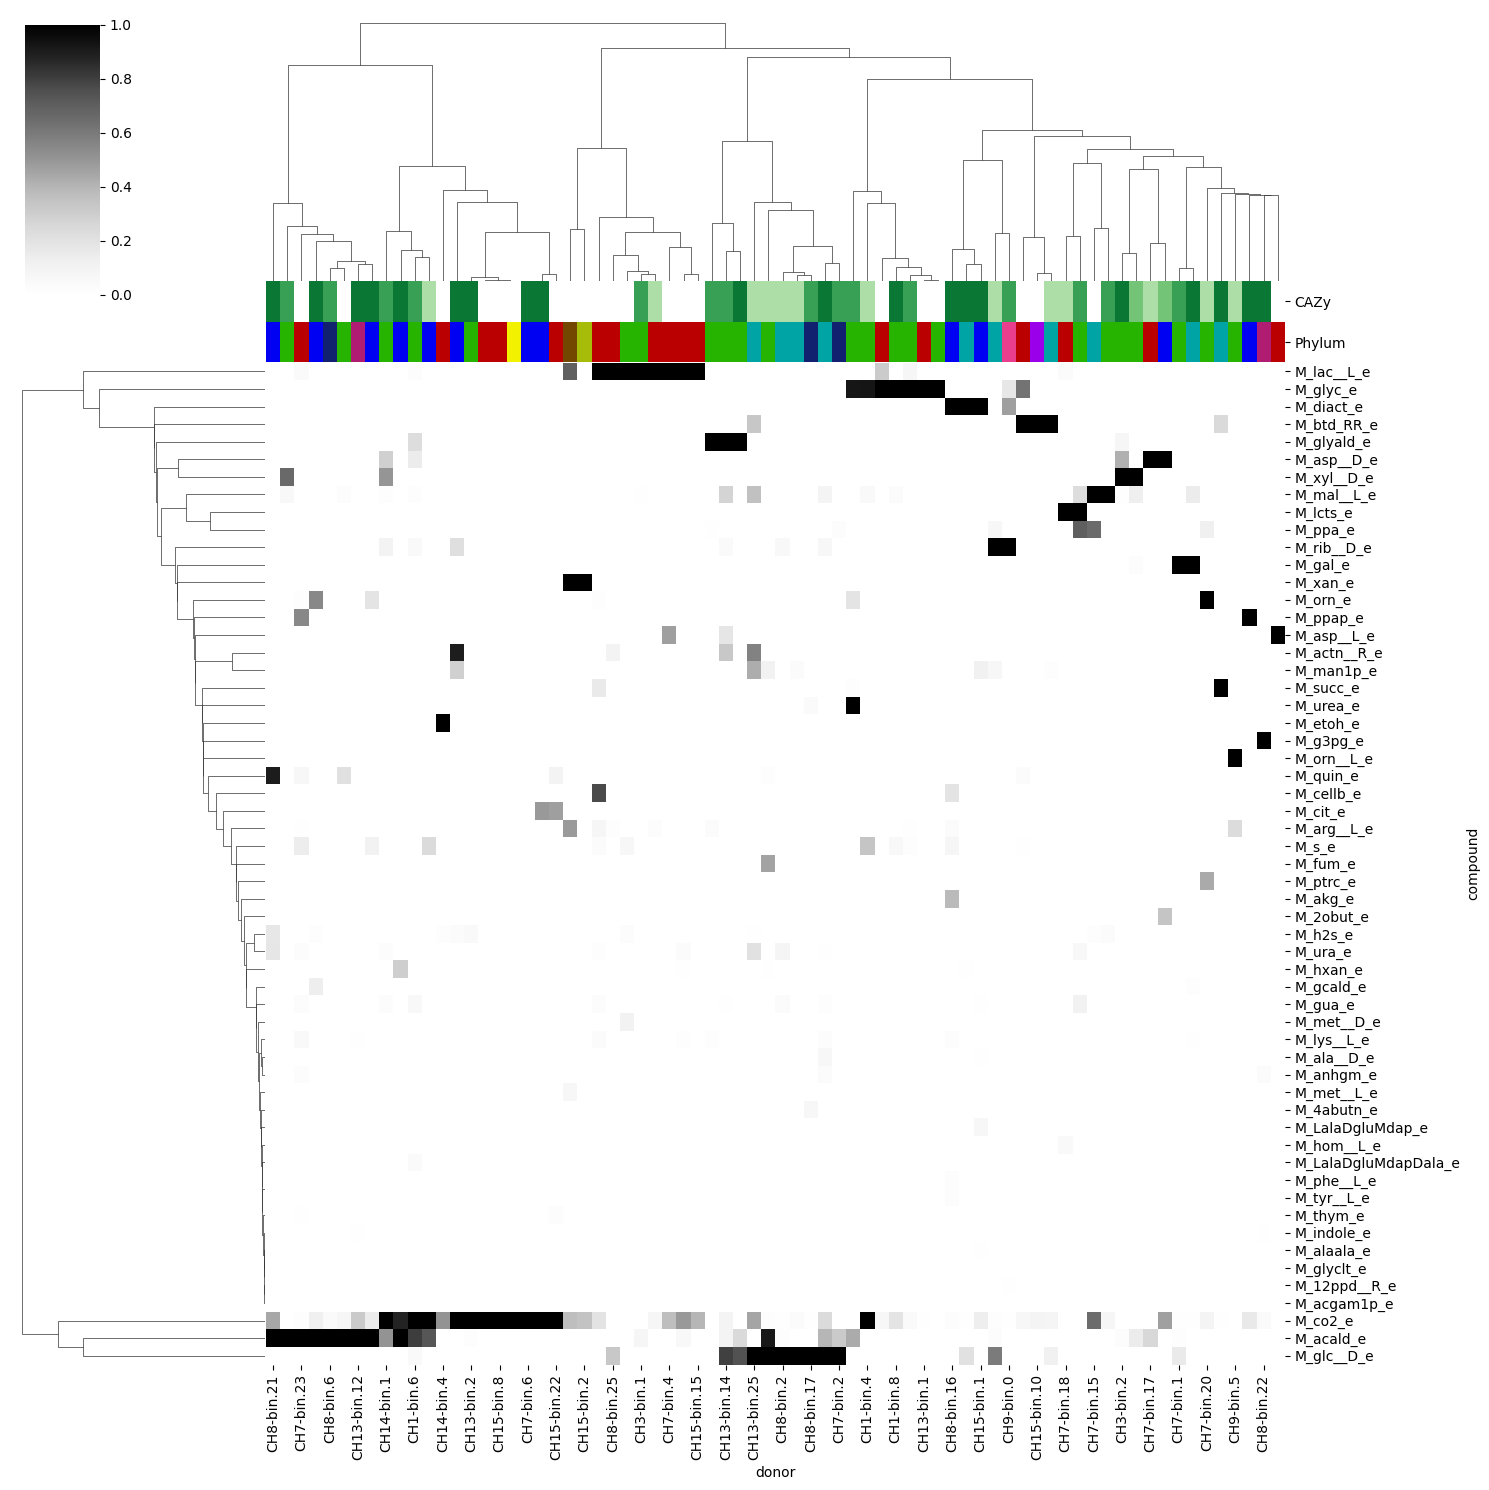

In [189]:

sns.clustermap(figsize=(15,15),
               data=steadiercom_donor,
               cmap="Greys",
               vmin=0,
               #vmax=1, 
               method="ward",
               metric="euclidean",
               standard_scale=1,
               col_colors=colrs_df,
               yticklabels=True)

## 1. Sphaerochaetaceae receives and donates more Glucose

Conclusion: All the members that receive glucose are also donating it (5 overlap, of 5 receiving and donating). Members that donate or receive glucose to/from Spirochaeataceae are only in one category when it comes to receiving or donating (no overlap between donators and receivers)

In [190]:
Sphaerochaetaceae_MAGs = all_mag_paper[(all_mag_paper["Family"]=="Sphaerochaetaceae") & (all_mag_paper.new_coverage>1)].index
Sphaerochaetaceae_MAGs

Index(['CH15-bin.7', 'CH7-bin.11', 'CH7-bin.8', 'CH7-bin.15', 'CH13-bin.25',
       'CH8-bin.2'],
      dtype='object', name='MAG')

In [191]:
all_mag_paper[(all_mag_paper.index.isin(Sphaerochaetaceae_MAGs))]

,Source,Substrate,Completeness (%),Contamination (%),Domain,Phylum,Class,Order,Family,Genus,Species,Genome size (bp),Scaffolds,N50,CDS prediction (DRAM),Column1,new_coverage
MAG,,,,,,,,,,,,,,,,,
CH15-bin.7,Compost_Digestate,PASC,98.86,1.14,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,Sphaerochaeta,Sphaerochaeta sp012514185,3131435.0,51.0,117918.0,2906.0,CH15-bin.7,7.856837
CH7-bin.11,Cow_Manure,PASC,94.25,0.00,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,Sphaerochaeta,NaN,2757910.0,86.0,52253.0,2535.0,CH7-bin.11,8.088421
CH7-bin.8,Cow_Manure,PASC,95.05,0.00,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,Sphaerochaeta,Sphaerochaeta sp012511235,3244483.0,52.0,120731.0,3054.0,CH7-bin.8,3.747918
CH7-bin.15,Cow_Manure,PASC,98.80,2.27,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,NaN,NaN,3033777.0,113.0,51835.0,2869.0,CH7-bin.15,1.014965
CH13-bin.25,Compost_Digestate,Avicel,98.86,2.27,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,Sphaerochaeta,Sphaerochaeta sp012514185,3203701.0,58.0,117413.0,2965.0,CH13-bin.25,6.692789
CH8-bin.2,Cow_Manure,Avicel,95.45,0.00,Bacteria,Spirochaetota,Spirochaetia,Sphaerochaetales,Sphaerochaetaceae,Sphaerochaeta,NaN,2908104.0,163.0,32809.0,2664.0,CH8-bin.2,5.387587


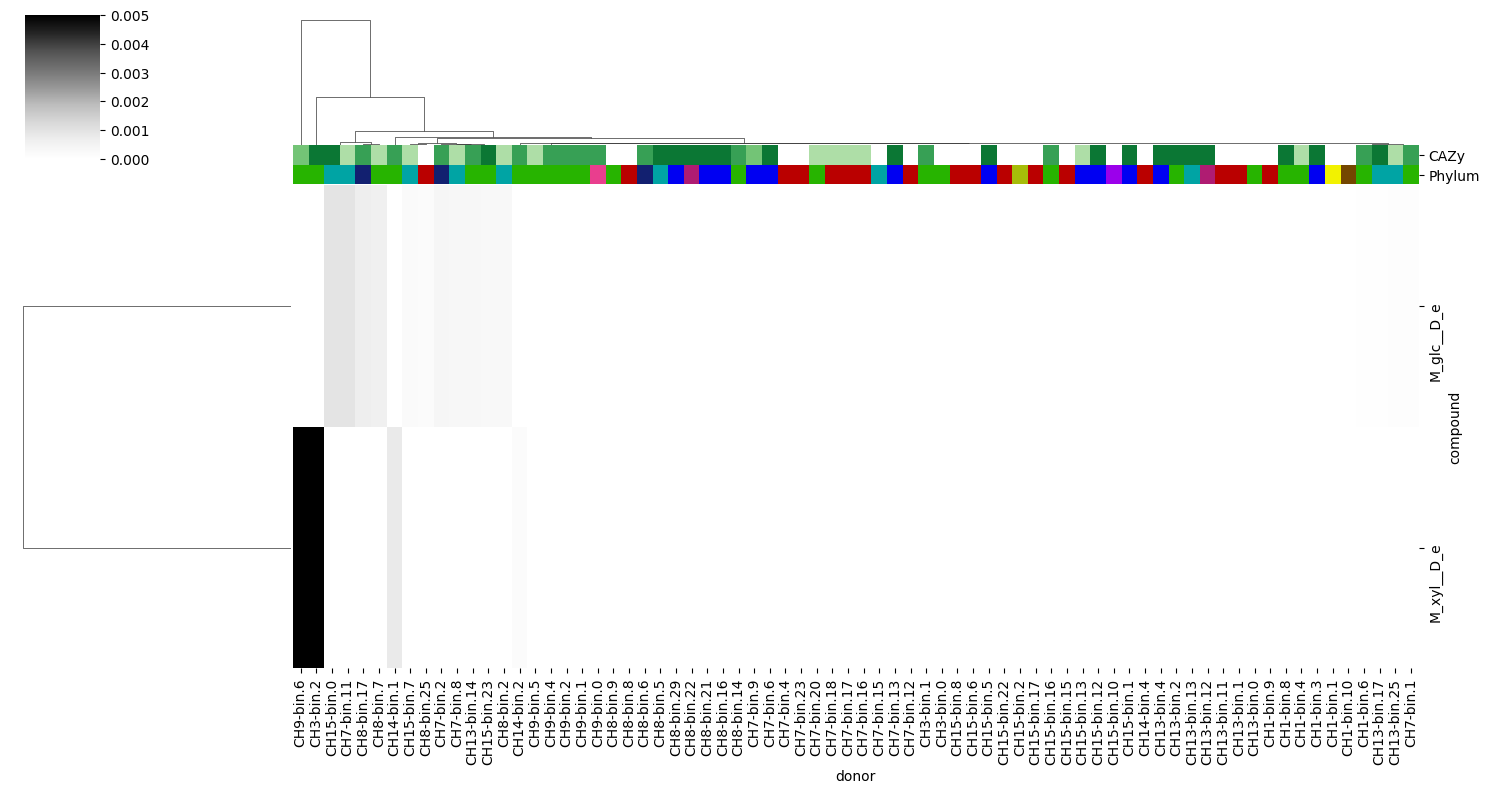

In [192]:

sns.clustermap(figsize=(15,8),data=steadiercom_donor.loc[["M_glc__D_e","M_xyl__D_e"]],
               cmap="Greys",
               vmin=0, 
               vmax=0.005,
               method="ward",
               metric="euclidean",
               col_colors=colrs_df,
               yticklabels=True,
               xticklabels=True)

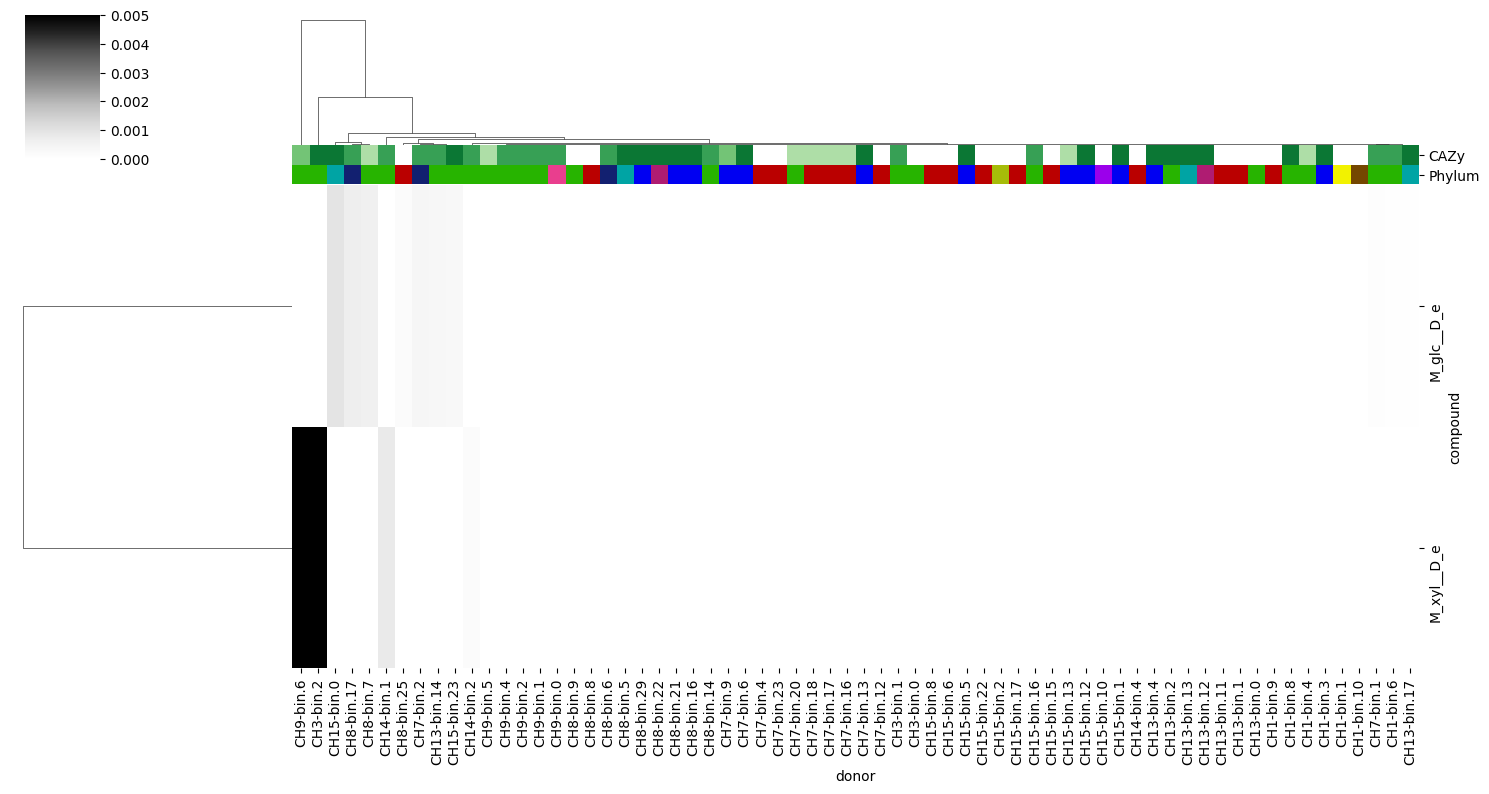

In [193]:

sns.clustermap(figsize=(15,8),
               data=steadiercom_donor.loc[["M_glc__D_e","M_xyl__D_e"],~(steadiercom_donor.columns.isin(Sphaerochaetaceae_MAGs))],
               cmap="Greys",
               vmin=0, 
               vmax=0.005,
               method="ward",
               metric="euclidean",
               col_colors=colrs_df,
               yticklabels=True,
               xticklabels=True)

In [194]:
steadiercom_donor.loc["M_glc__D_e",Sphaerochaetaceae_MAGs]

MAG
CH15-bin.7     0.000232
CH7-bin.11     0.000961
CH7-bin.8      0.000341
CH7-bin.15     0.000000
CH13-bin.25    0.000103
CH8-bin.2      0.000304
Name: M_glc__D_e, dtype: float64

In [195]:
steadiercom_receiver.loc["M_glc__D_e",Sphaerochaetaceae_MAGs]

MAG
CH15-bin.7     0.001329
CH7-bin.11     0.000716
CH7-bin.8      0.000180
CH7-bin.15     0.000000
CH13-bin.25    0.000541
CH8-bin.2      0.000764
Name: M_glc__D_e, dtype: float64

In [196]:
steadier_sample_cross[(steadier_sample_cross.donor.isin(Sphaerochaetaceae_MAGs)) & (steadier_sample_cross.receiver.isin(Sphaerochaetaceae_MAGs)) & (steadier_sample_cross.compound=="M_glc__D_e")]

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
41,CH7-bin.8,CH7-bin.11,M_glc__D_e,0.004670,0.025922,0.16,CM_P,SC2_C,0.000747
151,CH7-bin.11,CH7-bin.8,M_glc__D_e,0.000949,0.005268,0.19,CM_P,SC2_C,0.000180


In [197]:
Sphaerochaetaceae_donates = steadier_sample_cross[((steadier_sample_cross.donor.isin(Sphaerochaetaceae_MAGs))) & (steadier_sample_cross.compound=="M_glc__D_e") & (steadier_sample_cross.frequency>0.1)  ].sort_values(["mass_rate"])
Sphaerochaetaceae_donates

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
234,CH13-bin.25,CH13-bin.1,M_glc__D_e,0.000303,0.001682,0.34,CD_A,SC1_C,0.000103
214,CH7-bin.11,CH7-bin.18,M_glc__D_e,0.000618,0.003433,0.21,CM_P,SC2_C,0.000130
185,CH7-bin.8,CH7-bin.17,M_glc__D_e,0.000789,0.004381,0.19,CM_P,SC2_C,0.000150
179,CH7-bin.11,CH7-bin.17,M_glc__D_e,0.000816,0.004530,0.50,CM_P,SC2_C,0.000408
151,CH7-bin.11,CH7-bin.8,M_glc__D_e,0.000949,0.005268,0.19,CM_P,SC2_C,0.000180
143,CH7-bin.11,CH7-bin.1,M_glc__D_e,0.001019,0.005659,0.29,CM_P,SC2_C,0.000296
140,CH7-bin.8,CH7-bin.1,M_glc__D_e,0.001038,0.005763,0.12,CM_P,SC2_C,0.000125
95,CH15-bin.7,CH15-bin.17,M_glc__D_e,0.001274,0.007072,0.15,CD_P,SC1_C,0.000191
82,CH15-bin.7,CH15-bin.13,M_glc__D_e,0.001411,0.007833,0.15,CD_P,SC1_C,0.000212
85,CH8-bin.2,CH8-bin.6,M_glc__D_e,0.002028,0.011255,0.15,CM_A,SC2_C,0.000304


In [198]:
Sphaerochaetaceae_receives = steadier_sample_cross[((steadier_sample_cross.receiver.isin(Sphaerochaetaceae_MAGs))) & (steadier_sample_cross.compound=="M_glc__D_e") & (steadier_sample_cross.frequency>0.1)].sort_values(["mass_rate"])
Sphaerochaetaceae_receives

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
151,CH7-bin.11,CH7-bin.8,M_glc__D_e,0.000949,0.005268,0.19,CM_P,SC2_C,0.000180
73,CH8-bin.7,CH8-bin.2,M_glc__D_e,0.002600,0.014434,0.27,CM_A,SC2_C,0.000702
36,CH13-bin.14,CH13-bin.25,M_glc__D_e,0.002706,0.015020,0.20,CD_A,SC1_C,0.000541
63,CH8-bin.17,CH8-bin.2,M_glc__D_e,0.002948,0.016363,0.28,CM_A,SC2_C,0.000825
41,CH7-bin.8,CH7-bin.11,M_glc__D_e,0.004670,0.025922,0.16,CM_P,SC2_C,0.000747
13,CH15-bin.0,CH15-bin.7,M_glc__D_e,0.004922,0.027318,0.27,CD_P,SC1_C,0.001329
36,CH7-bin.2,CH7-bin.11,M_glc__D_e,0.005262,0.029210,0.13,CM_P,SC2_C,0.000684


**How many different receivers of the glucose from Sphaerochaetaceae?**

In [199]:
len(set(Sphaerochaetaceae_donates.receiver.values))

11

**How many different donators of the glucose to Sphaerochaetaceae?**

In [200]:
len(set(Sphaerochaetaceae_receives.donor.values))

7

**How many of the receivers of glucose from Sphaerochaetaceae are also donating to Sphaerochaetaceae?**

This has to be the sharing withing the two members of the Sphaerochaetaceae family.

In [201]:
len(set(Sphaerochaetaceae_donates.receiver.values).intersection(set(Sphaerochaetaceae_receives.donor.values)))

2

**How many of the Sphaerochaetaceae donating are the same as the ones receiving?**

In [202]:
len(set(Sphaerochaetaceae_donates.donor.values).intersection(set(Sphaerochaetaceae_receives.receiver.values)))

5

**Number of Sphaerochaetaceae receiving**

In [203]:
len(set(Sphaerochaetaceae_receives.receiver.values))

5

**Number of Sphaerochaetaceae donating**

In [204]:
len(set(Sphaerochaetaceae_receives.donor.values))

7

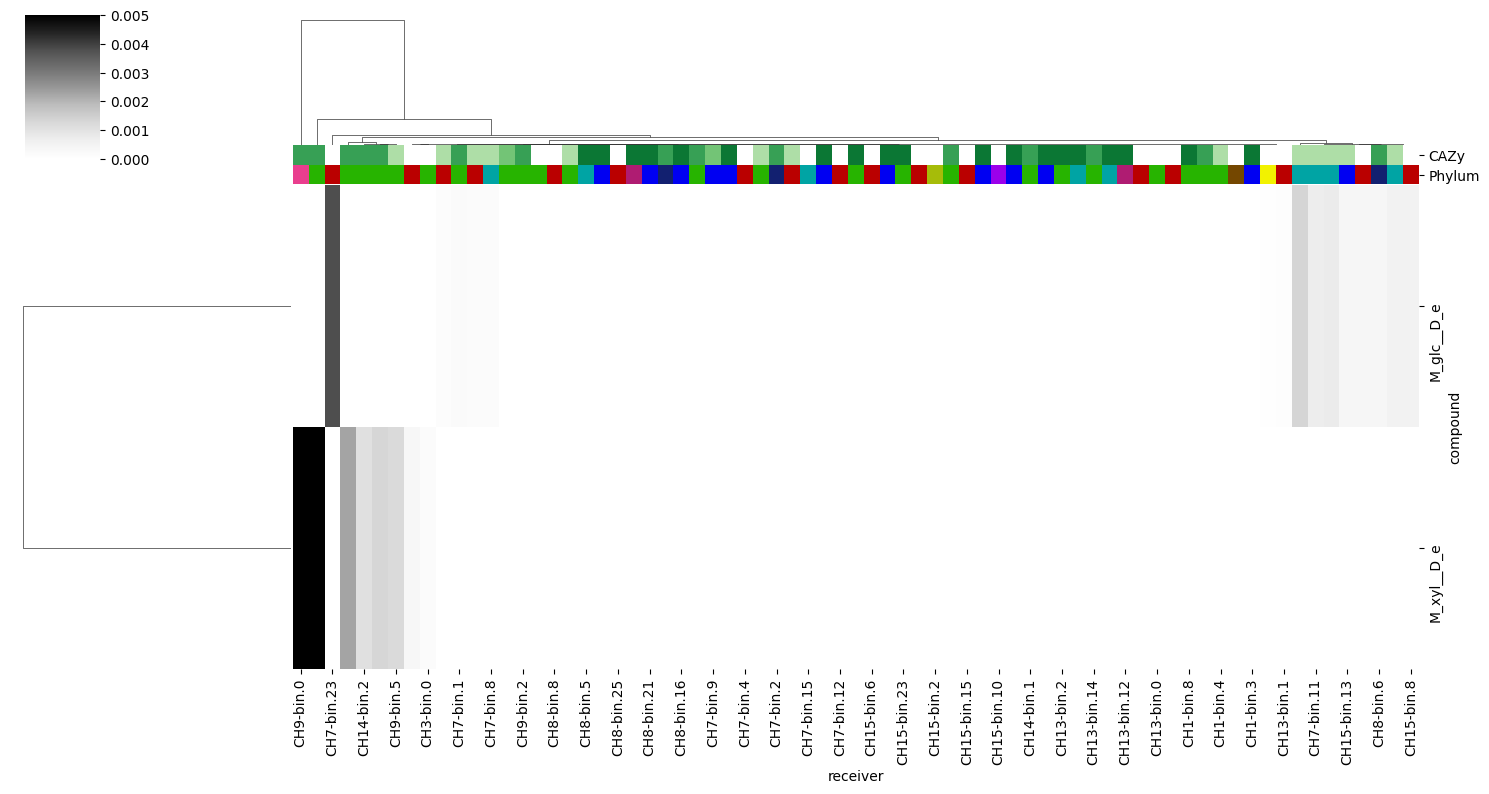

In [205]:

sns.clustermap(figsize=(15,8),data=steadiercom_receiver.loc[["M_glc__D_e","M_xyl__D_e"]],cmap="Greys",vmin=0,vmax=0.005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

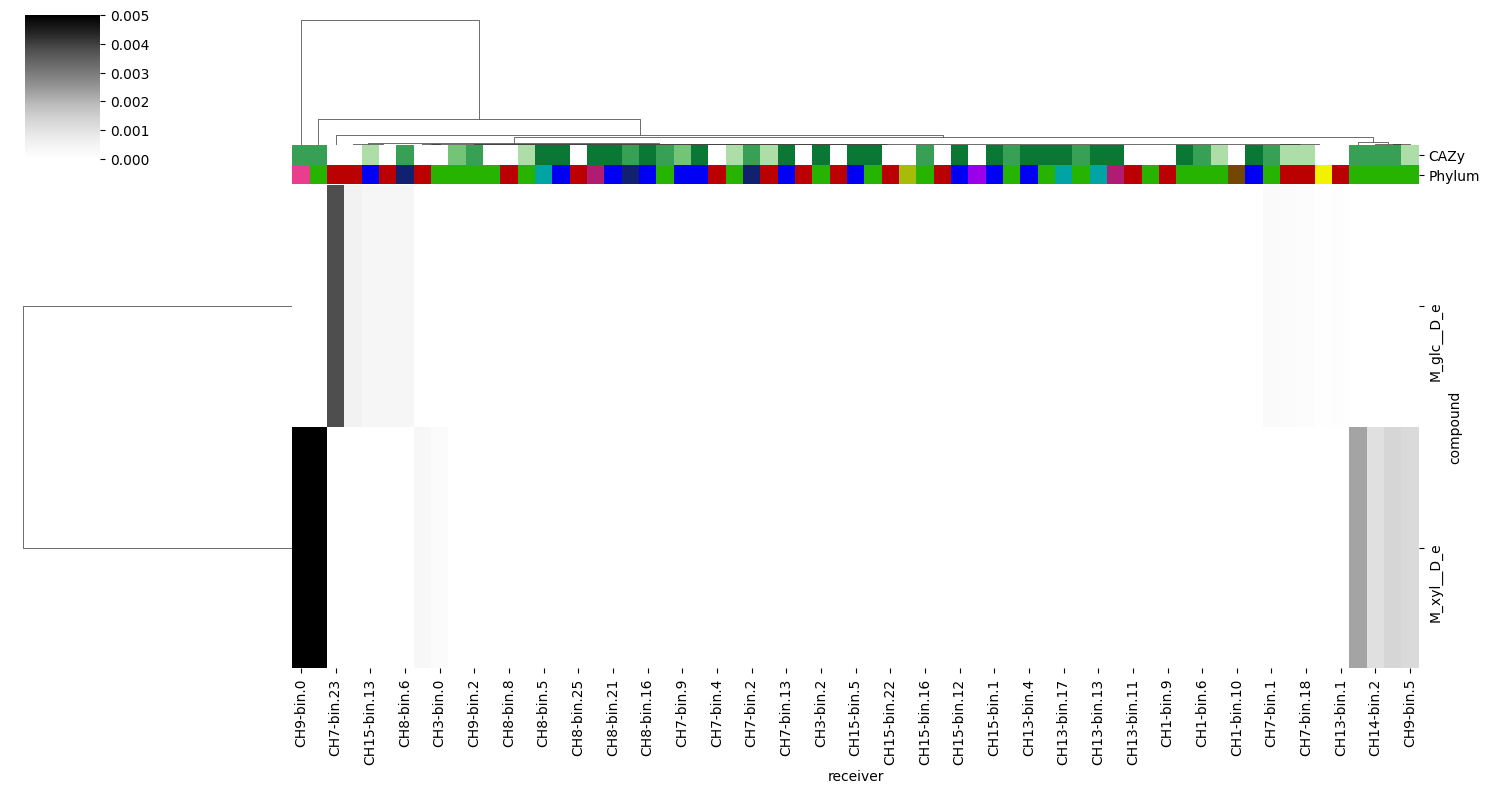

In [206]:

sns.clustermap(figsize=(15,8),data=steadiercom_receiver.loc[["M_glc__D_e","M_xyl__D_e"],~(steadiercom_receiver.columns.isin(Sphaerochaetaceae_MAGs))],cmap="Greys",vmin=0,vmax=0.005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

## 2. f_Lactobacillaceae receives L Ornithine


Conclusion: The two Lactobacillaceae are producing and sharing L-ornithine with each other. 

In [207]:
Lactobacillaceae_MAGs = all_mag_paper[(all_mag_paper["Family"]=="Lactobacillaceae") & (all_mag_paper.new_coverage>1)].index


In [208]:
all_mag_paper[(all_mag_paper.index.isin(Lactobacillaceae_MAGs))]

,Source,Substrate,Completeness (%),Contamination (%),Domain,Phylum,Class,Order,Family,Genus,Species,Genome size (bp),Scaffolds,N50,CDS prediction (DRAM),Column1,new_coverage
MAG,,,,,,,,,,,,,,,,,
CH9-bin.5,Cow_Manure,Xylan,99.06,0.21,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lentilactobacillus,Lentilactobacillus rapi,2774013.0,81.0,52390.0,2605.0,CH9-bin.5,3.118266
CH9-bin.4,Cow_Manure,Xylan,98.82,0.78,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lentilactobacillus,Lentilactobacillus diolivorans,3505765.0,111.0,93698.0,3335.0,CH9-bin.4,1.906553


In [209]:
steadier_sample_cross[(steadier_sample_cross.donor.isin(Lactobacillaceae_MAGs)) & (steadier_sample_cross.compound=="M_orn__L_e")]

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
112,CH9-bin.5,CH9-bin.4,M_orn__L_e,0.000476,0.003578,0.70,CM_X,SC1_X,0.000334
257,CH9-bin.4,CH9-bin.5,M_orn__L_e,0.000006,0.000046,0.25,CM_X,SC1_X,0.000002


## 3.a Lachnospiraceae is sharing guanine

Conclusion: This might be biologically significant.
- From production clustermap from simple compounds no member can produce guanine. 
- From the steadiercom solutions few members seem to be donating the compound and they are almost all in the Firmicutes phylum

In [210]:
"gua" in compound_producer_df.index

False

In [211]:
Lachnospiraceae_MAGs =  all_mag_paper[(all_mag_paper["Family"]=="Lachnospiraceae") & (all_mag_paper.new_coverage>1)].index


In [212]:
all_mag_paper[all_mag_paper.index.isin(Lachnospiraceae_MAGs)].groupby(["Source","Substrate"]).count()

Completeness (%)  Contamination (%)  Domain  \
Source            Substrate                                                
Compost_Digestate Avicel                    2                  2       2   
                  PASC                      1                  1       1   
                  Xylan                     2                  2       2   
Cow_Manure        Xylan                     1                  1       1   
Marshland         PASC                      2                  2       2   

                             Phylum  Class  Order  Family  Genus  Species  \
Source            Substrate                                                 
Compost_Digestate Avicel          2      2      2       2      2        2   
                  PASC            1      1      1       1      1        0   
                  Xylan           2      2      2       2      2        2   
Cow_Manure        Xylan           1      1      1       1      1        1   
Marshland         PASC            2      2      2       2      2        2   

                             Genome size (bp)  Scaffolds  N50  \
Source            Substrate                                     
Compost_Digestate Avicel                    2          2    2   
                  PASC                      1          1    1   
                  Xylan                     2          2    2   
Cow_Manure        Xylan                     1          1    1   
Marshland         PASC                      2          2    2   

                             CDS prediction (DRAM)  Column1  new_coverage  
Source            Substrate                                                
Compost_Digestate Avicel                         2        2             2  
                  PASC                           1        1             1  
                  Xylan                          2        2             2  
Cow_Manure        Xylan                          1        1             1  
Marshland         PASC                           2        2             2

In [213]:
steadiercom_donor.loc[["M_gua_e","M_ura_e"]]

donor,CH1-bin.1,CH1-bin.10,CH1-bin.3,CH1-bin.4,CH1-bin.6,CH1-bin.8,CH1-bin.9,CH13-bin.0,CH13-bin.1,CH13-bin.11,...,CH8-bin.6,CH8-bin.7,CH8-bin.8,CH8-bin.9,CH9-bin.0,CH9-bin.1,CH9-bin.2,CH9-bin.4,CH9-bin.5,CH9-bin.6
compound,,,,,,,,,,,,,,,,,,,,,
M_gua_e,0.0,0.0,0.0,0.0,0.000044,0.0,0.000000,0.0,0.0,0.000012,...,0.0,0.0,0.0,0.0,0.0,0.000067,0.0,0.0,0.0,0.0
M_ura_e,0.0,0.0,0.0,0.0,0.000000,0.0,0.000038,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.000034,0.0,0.0,0.0,0.0


In [214]:
steadiercom_donor.loc[["M_gua_e","M_ura_e"]].max().max()

6.651836919946182e-05

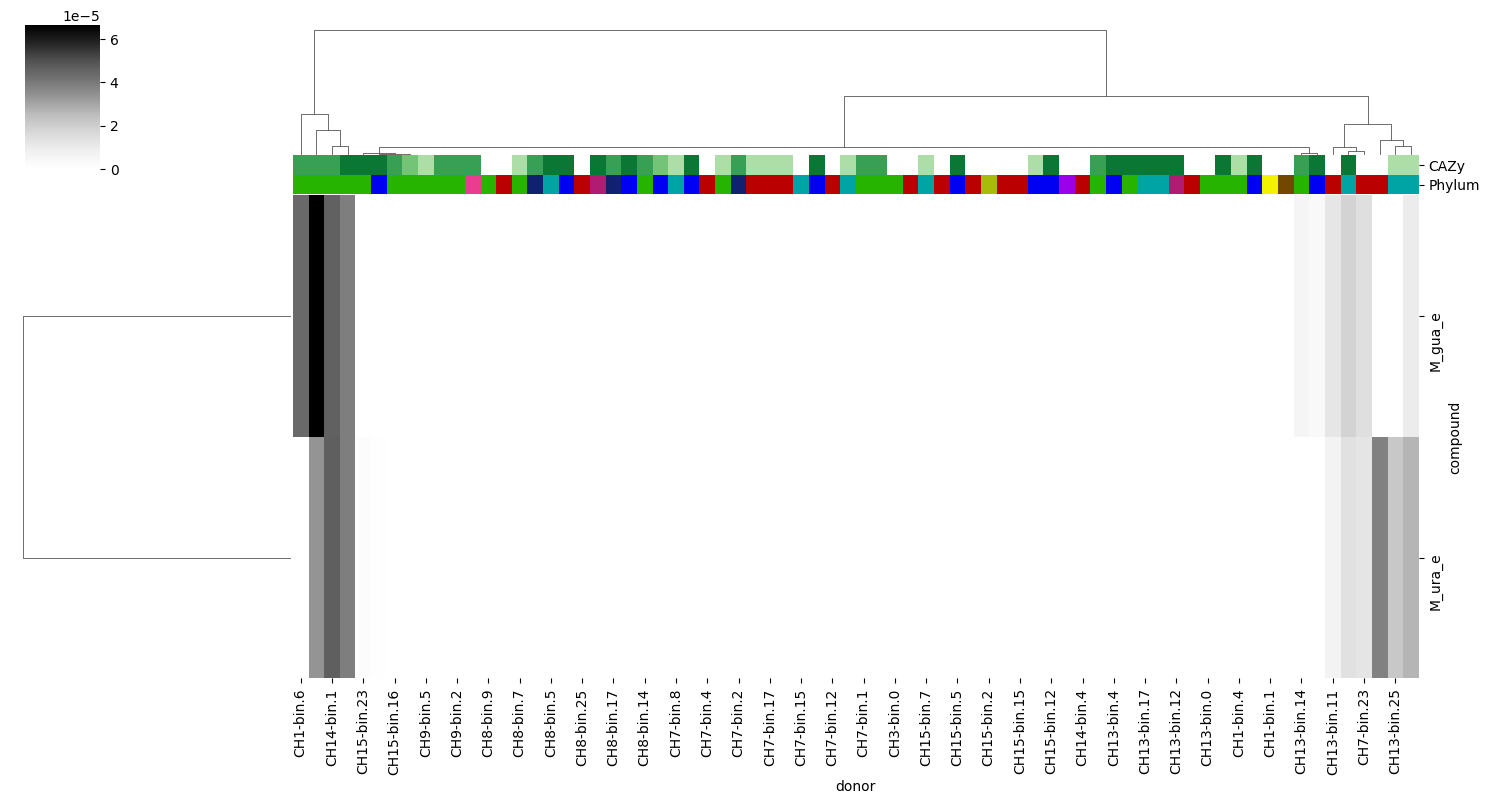

In [215]:

sns.clustermap(figsize=(15,8),
               data=steadiercom_donor.loc[["M_gua_e","M_ura_e"]],
               cmap="Greys",
               vmin=0,
               #vmax=1, 
               method="ward",
               metric="euclidean",
               col_colors=colrs_df,
               yticklabels=True)

**Removing the Lachnospiraceae results in removal of (nearly) all members of the Firmicutes phylum**

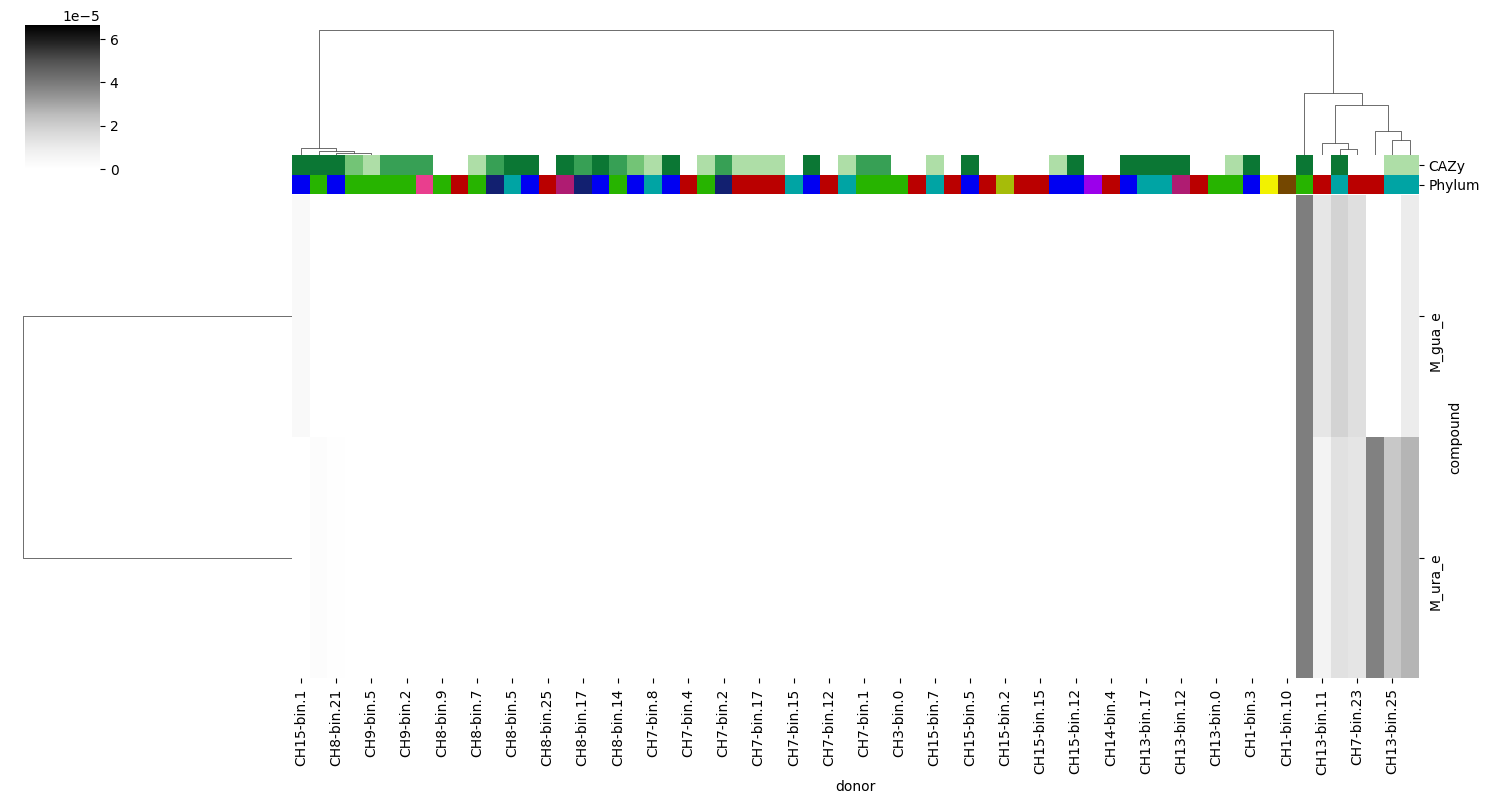

In [216]:
sns.clustermap(figsize=(15,8),
               data=steadiercom_donor.loc[["M_gua_e","M_ura_e"],~(steadiercom_donor.columns.isin(Lachnospiraceae_MAGs))],
               cmap="Greys",
               vmin=0,
               vmax=steadiercom_donor.loc[["M_gua_e","M_ura_e"]].max().max(),
               method="ward",
               metric="euclidean",
               col_colors=colrs_df,
               yticklabels=True)

## 2.b Lachnospiraceae is sharing Malate

In [217]:
"mal__L" in compound_producer_df.index

True

In [218]:
Lachnospiraceae_MAGs =  all_mag_paper[(all_mag_paper["Family"]=="Lachnospiraceae") & (all_mag_paper.new_coverage>1)].index


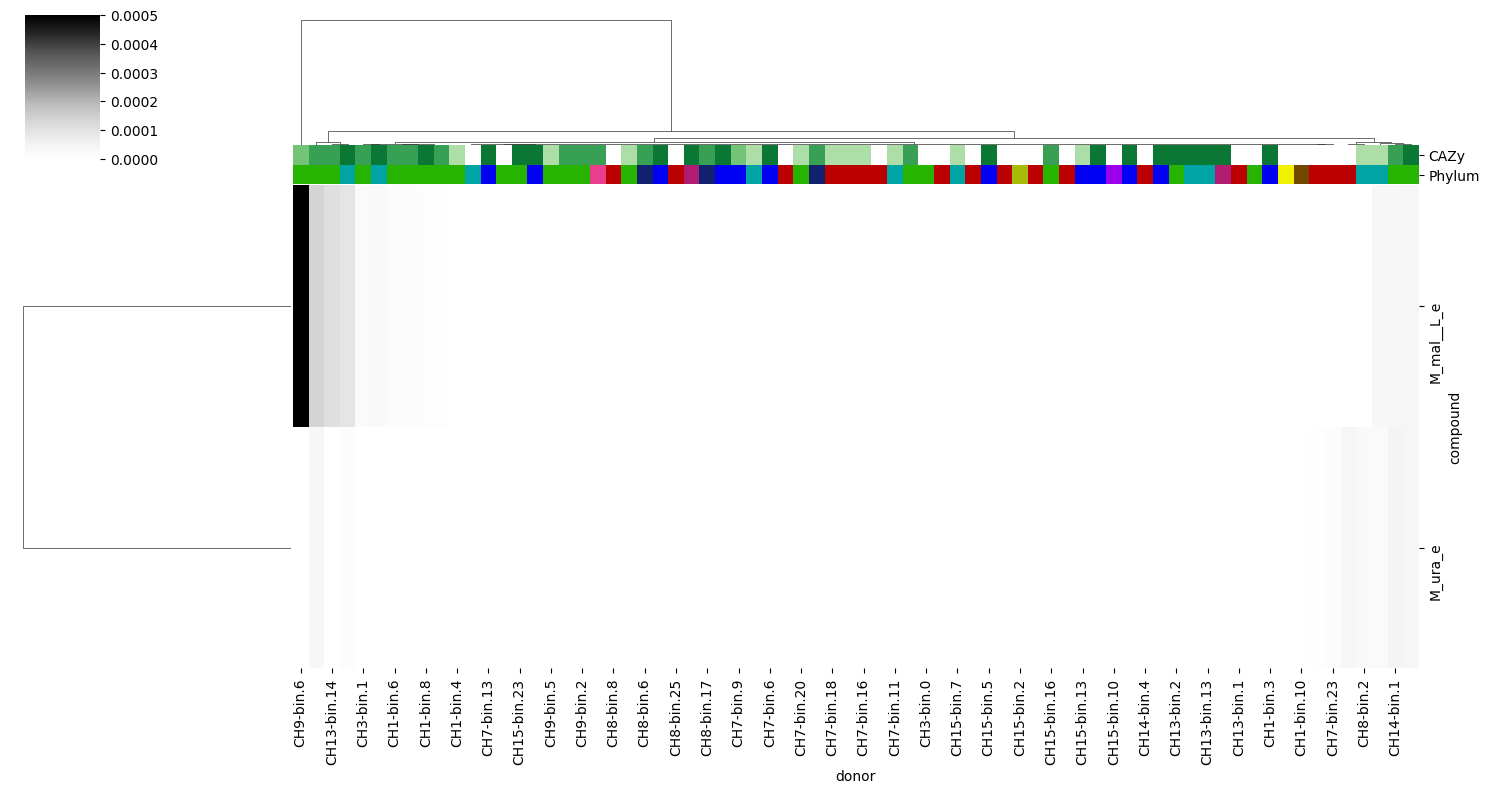

In [219]:

sns.clustermap(figsize=(15,8),data=steadiercom_donor.loc[["M_mal__L_e","M_ura_e"]],cmap="Greys",vmin=0,vmax=0.0005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

**Removing the Lachnospiraceae results in removal of (nearly) all members of the Firmicutes phylum**

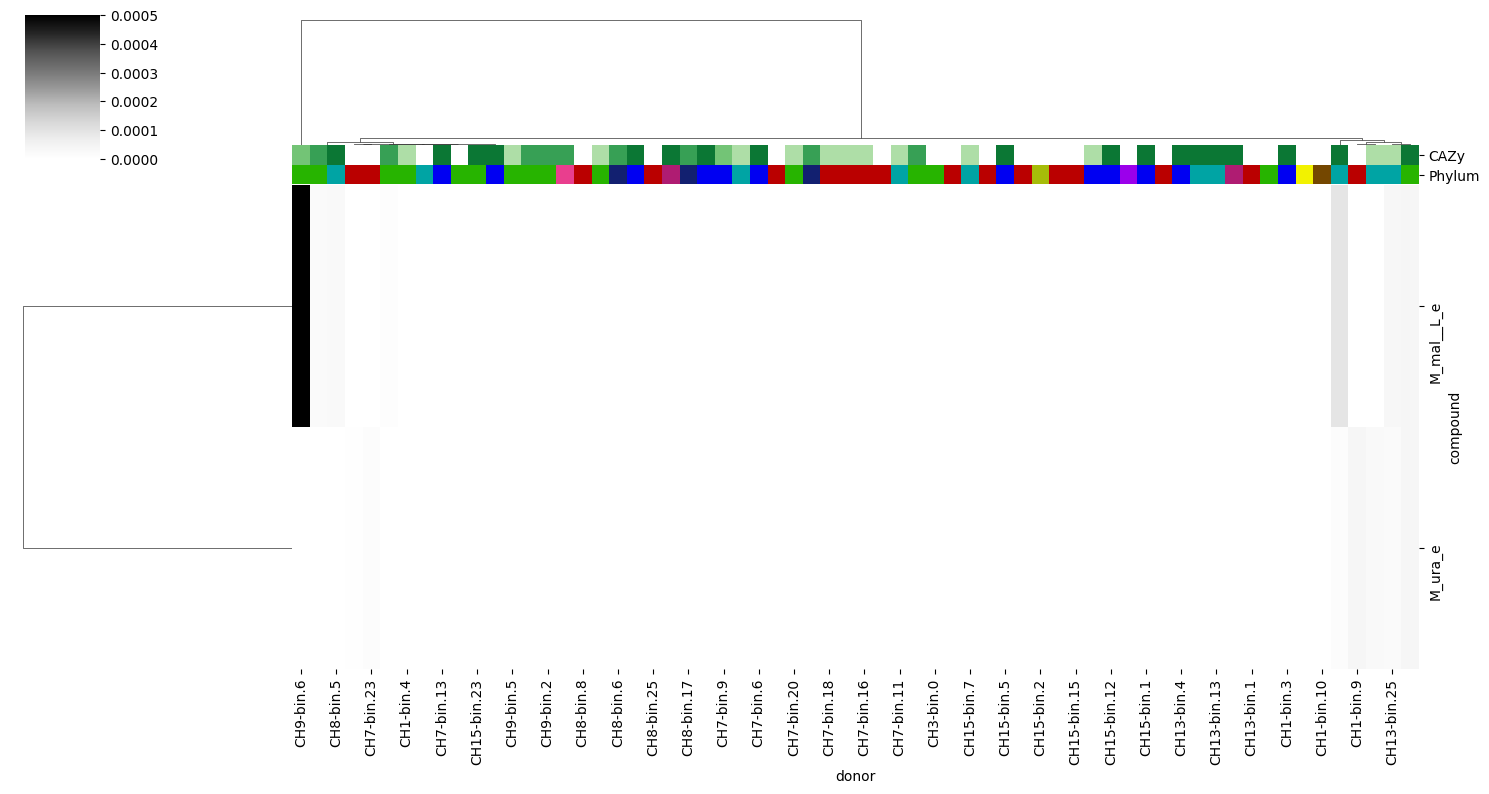

In [220]:
sns.clustermap(figsize=(15,8),data=steadiercom_donor.loc[["M_mal__L_e","M_ura_e"],~(steadiercom_donor.columns.isin(Lachnospiraceae_MAGs))],cmap="Greys",vmin=0,vmax=0.0005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

In [221]:
Clostridiaceae_MAGs =  all_mag_paper[(all_mag_paper["Family"]=="Clostridiaceae") & (all_mag_paper.new_coverage>1)].index

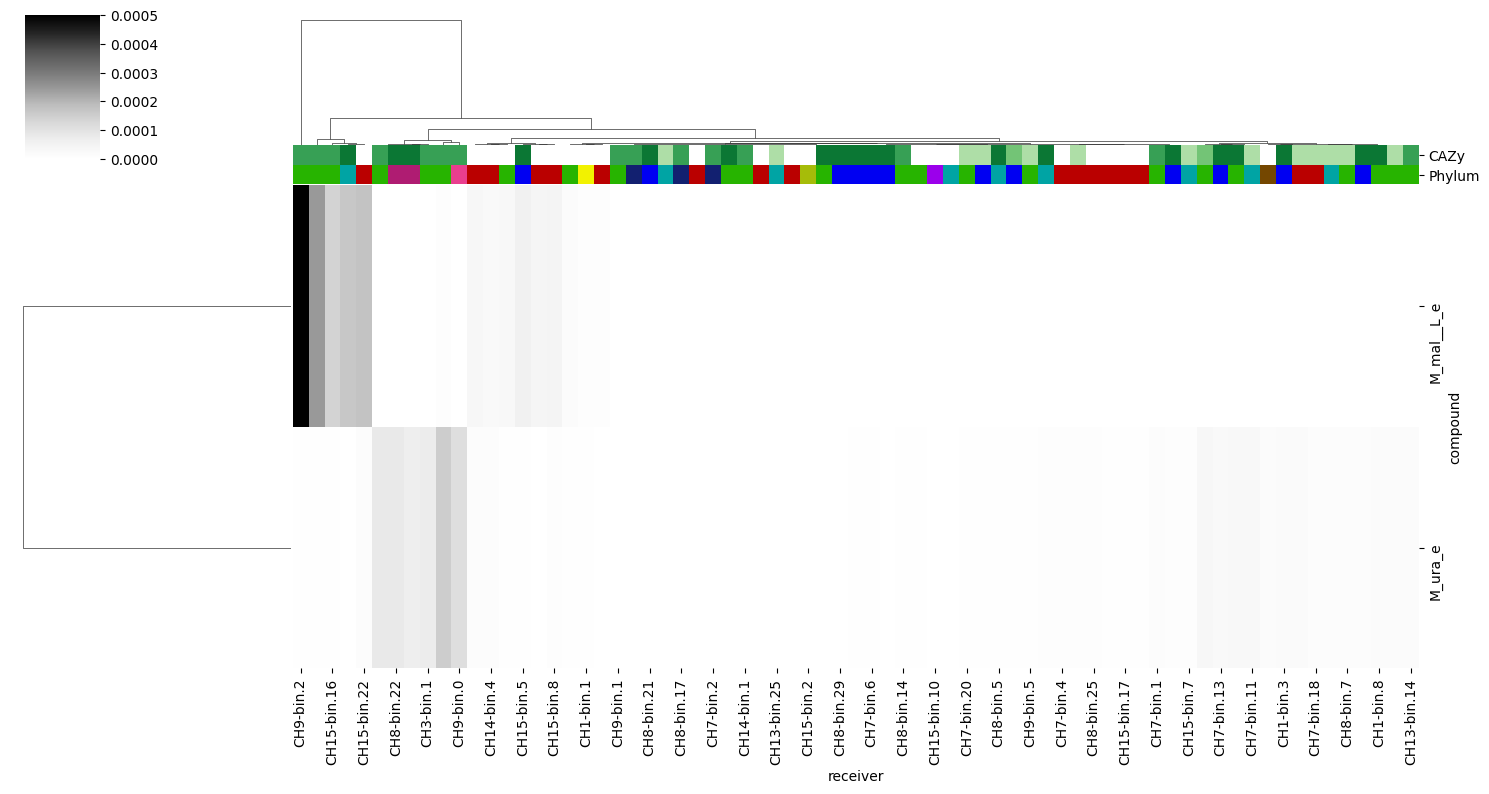

In [222]:
sns.clustermap(figsize=(15,8),data=steadiercom_receiver.loc[["M_mal__L_e","M_ura_e"]],cmap="Greys",vmin=0,vmax=0.0005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

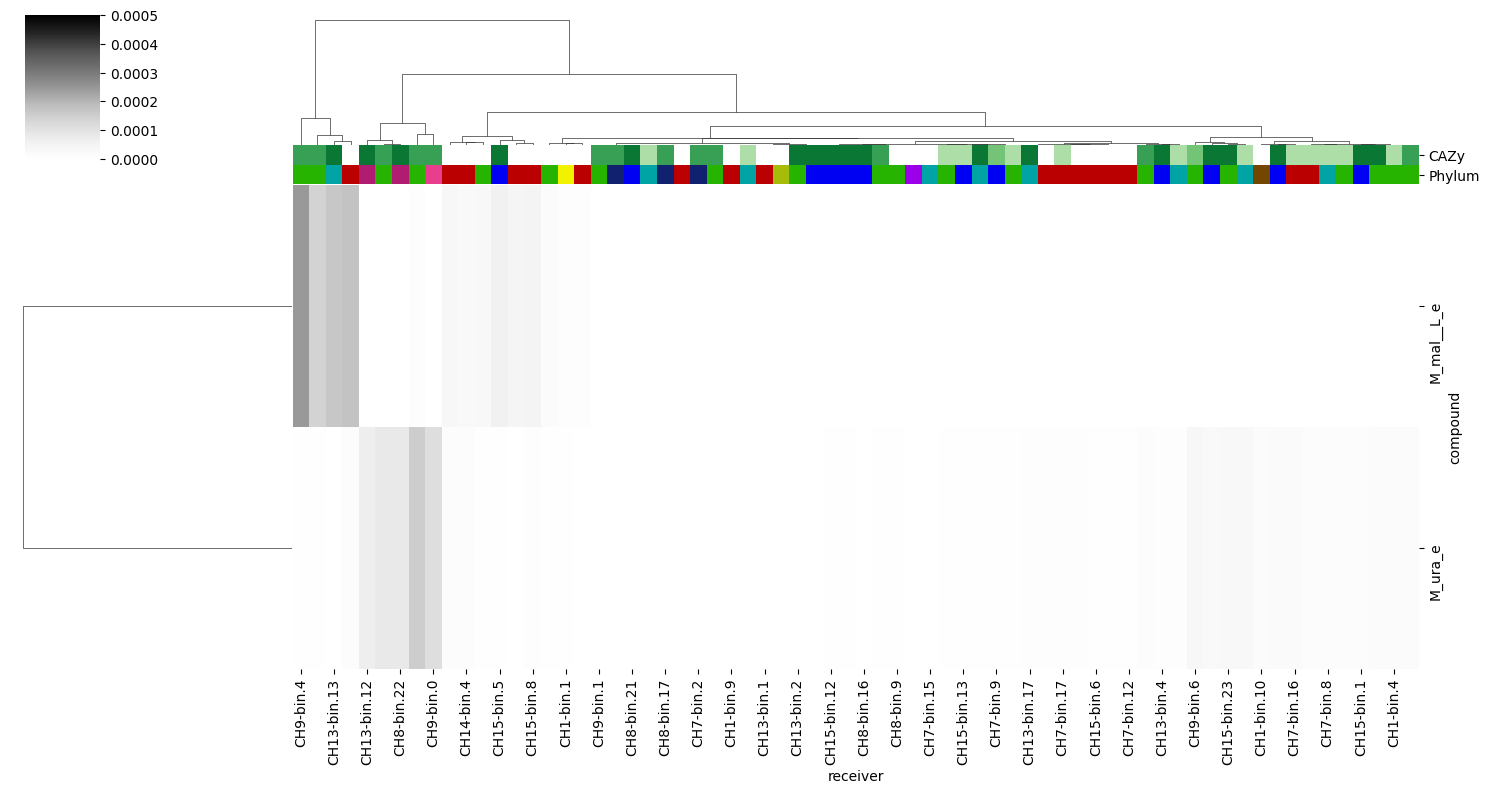

In [223]:
sns.clustermap(figsize=(15,8),data=steadiercom_receiver.loc[["M_mal__L_e","M_ura_e"],~(steadiercom_receiver.columns.isin(Clostridiaceae_MAGs))],cmap="Greys",vmin=0,vmax=0.0005, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

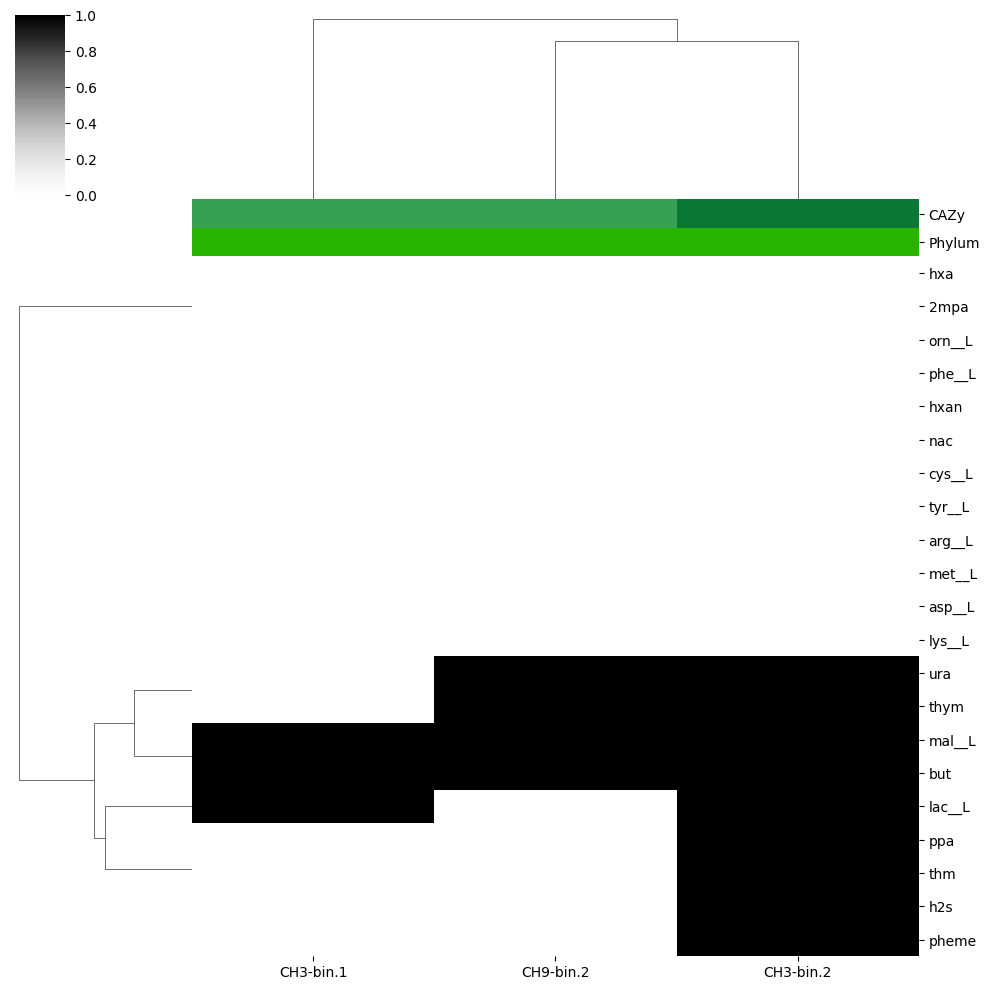

In [224]:
sns.clustermap(data=compound_producer_df.loc[:,compound_producer_df.columns.isin(Clostridiaceae_MAGs)], cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

## 4. f_Desulfovibrionaceae is sharing L-lacate

**Conclusion**: f_Desulfovibrionaceae is contributing with more lactate, but it seems to be less frequently found in our solutions. We should check how big the contribution truly is. 

In [225]:
Desulfovibrionaceae_MAGs =  all_mag_paper[(all_mag_paper["Family"]=="Desulfovibrionaceae") & (all_mag_paper.new_coverage>1)].index


**They are not able to produce any of the compounds in question**

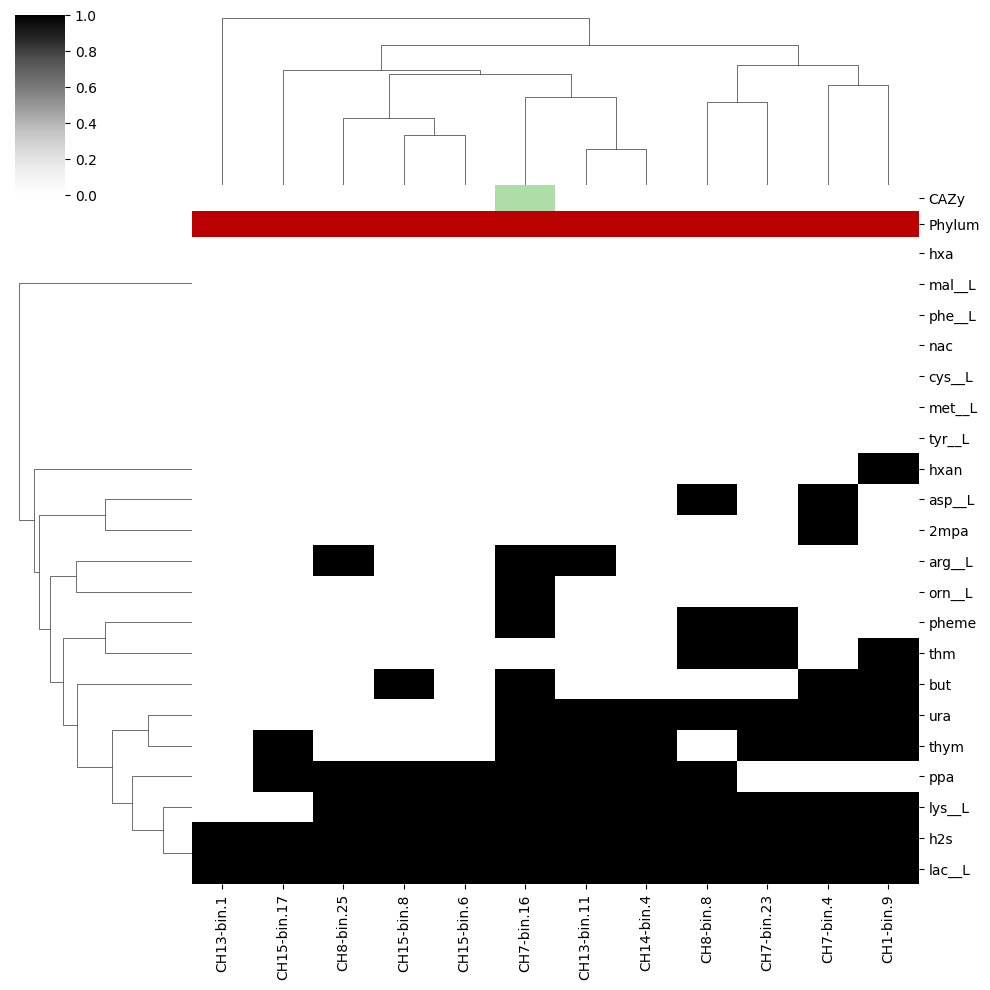

In [226]:
sns.clustermap(data=compound_producer_df.loc[:,compound_producer_df.columns.isin(Desulfovibrionaceae_MAGs)], cmap="Greys",vmin=False,method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

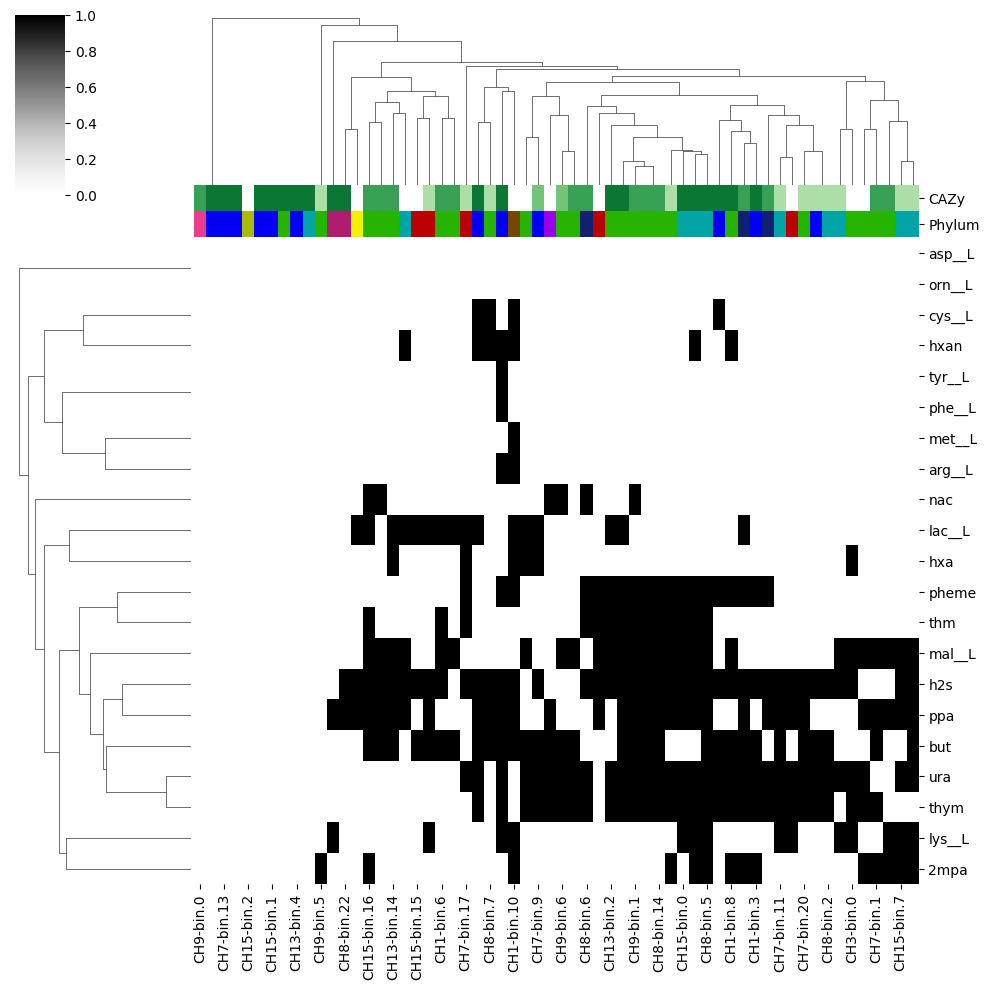

In [227]:
sns.clustermap(data=compound_producer_df.loc[:,~compound_producer_df.columns.isin(Desulfovibrionaceae_MAGs)], cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

In [228]:
Clostridiaceae_MAGs =  all_mag_paper[(all_mag_paper["Family"]=="Clostridiaceae") & (all_mag_paper.new_coverage>1)].index


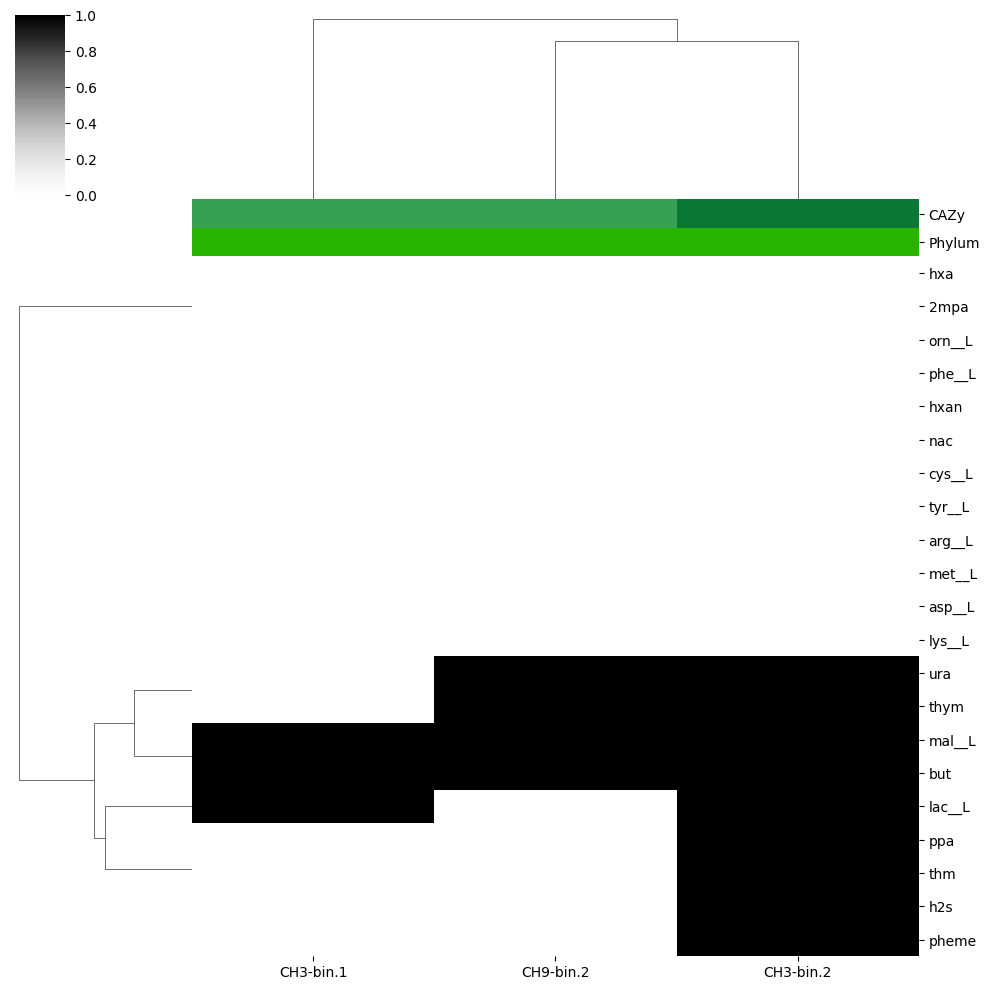

In [229]:
sns.clustermap(data=compound_producer_df.loc[:,compound_producer_df.columns.isin(Clostridiaceae_MAGs)], cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

### Compound producer

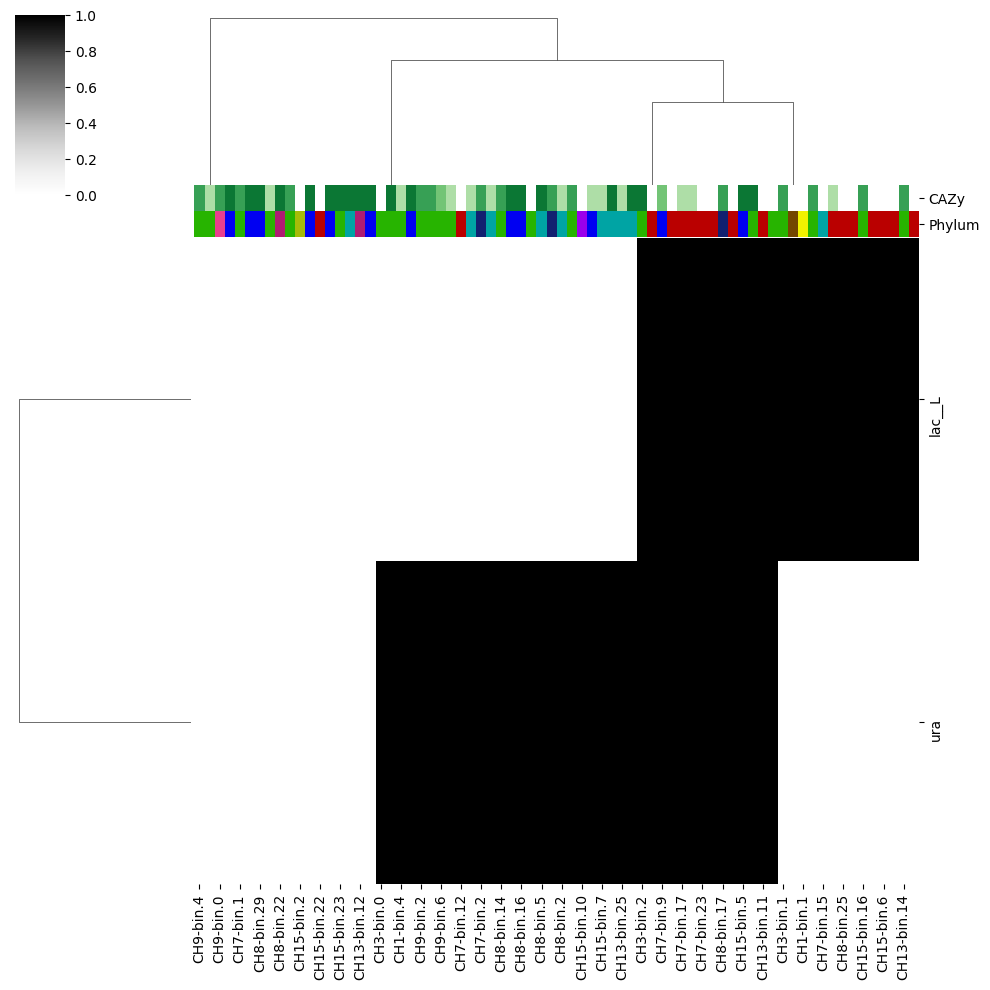

In [230]:
sns.clustermap(data=compound_producer_df.loc[["lac__L","ura"]], cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

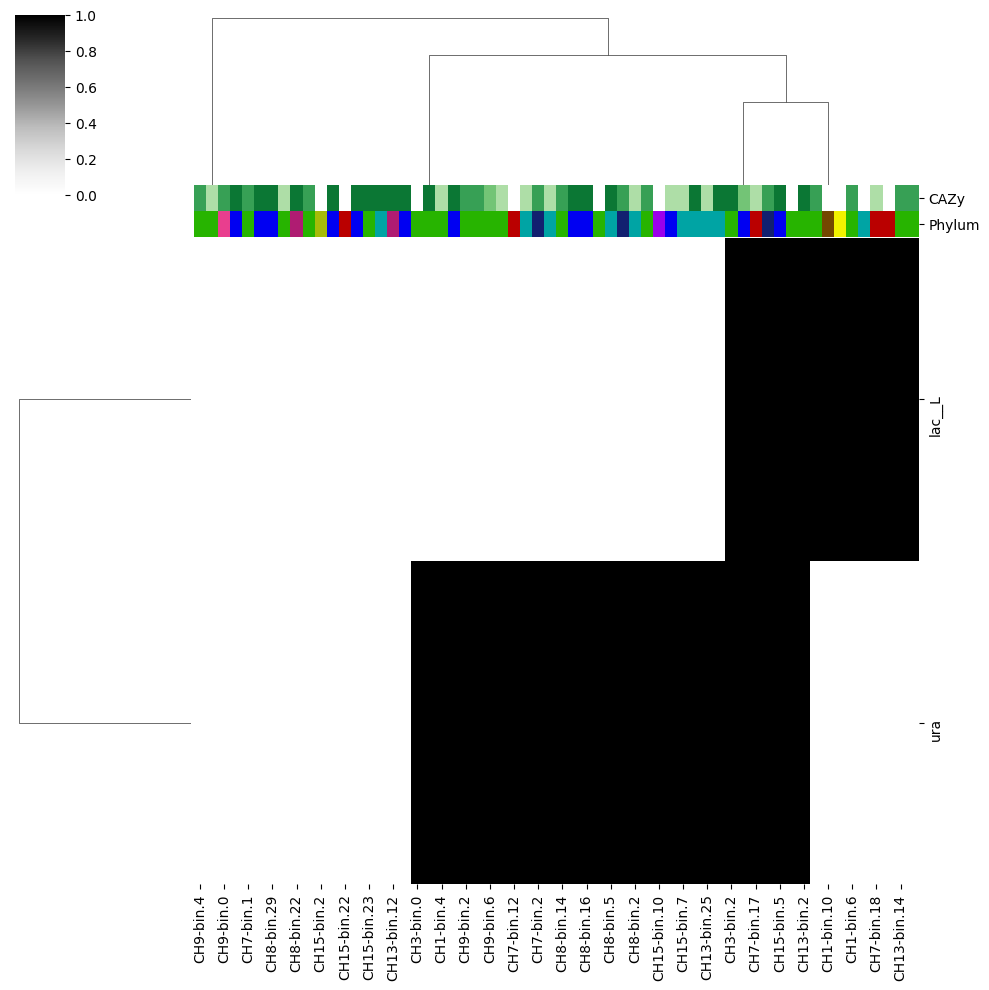

In [231]:
sns.clustermap(data=compound_producer_df.loc[["lac__L","ura"],~compound_producer_df.columns.isin(Desulfovibrionaceae_MAGs)], cmap="Greys",method="average",metric="jaccard",col_colors=colrs_df,yticklabels=True)

### SteadierCom results

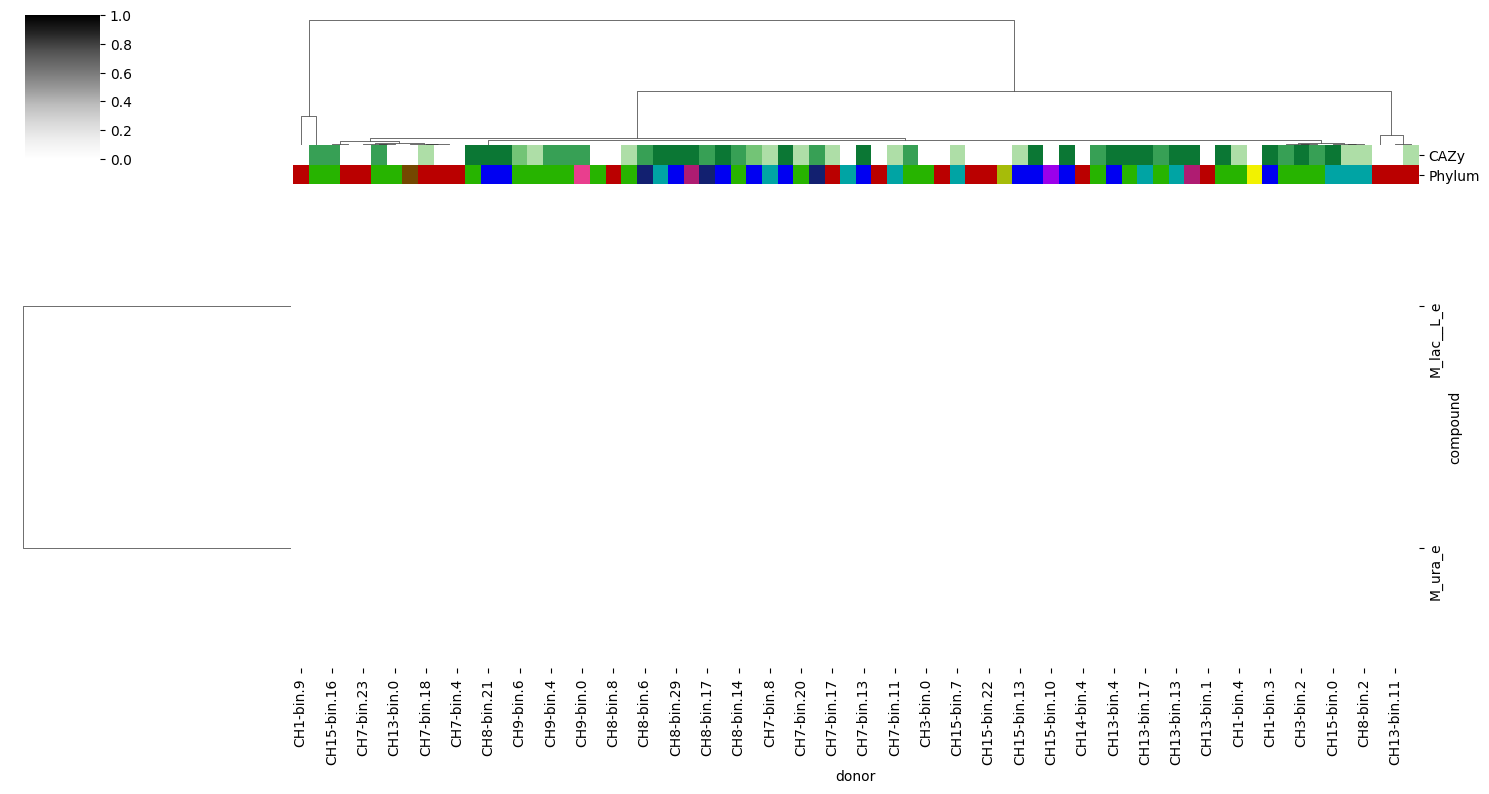

In [232]:

sns.clustermap(figsize=(15,8),data=steadiercom_donor.loc[["M_lac__L_e","M_ura_e"]],cmap="Greys",vmin=0,vmax=1, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

**Removing the Lachnospiraceae results in removal of (nearly) all members of the Firmicutes phylum**

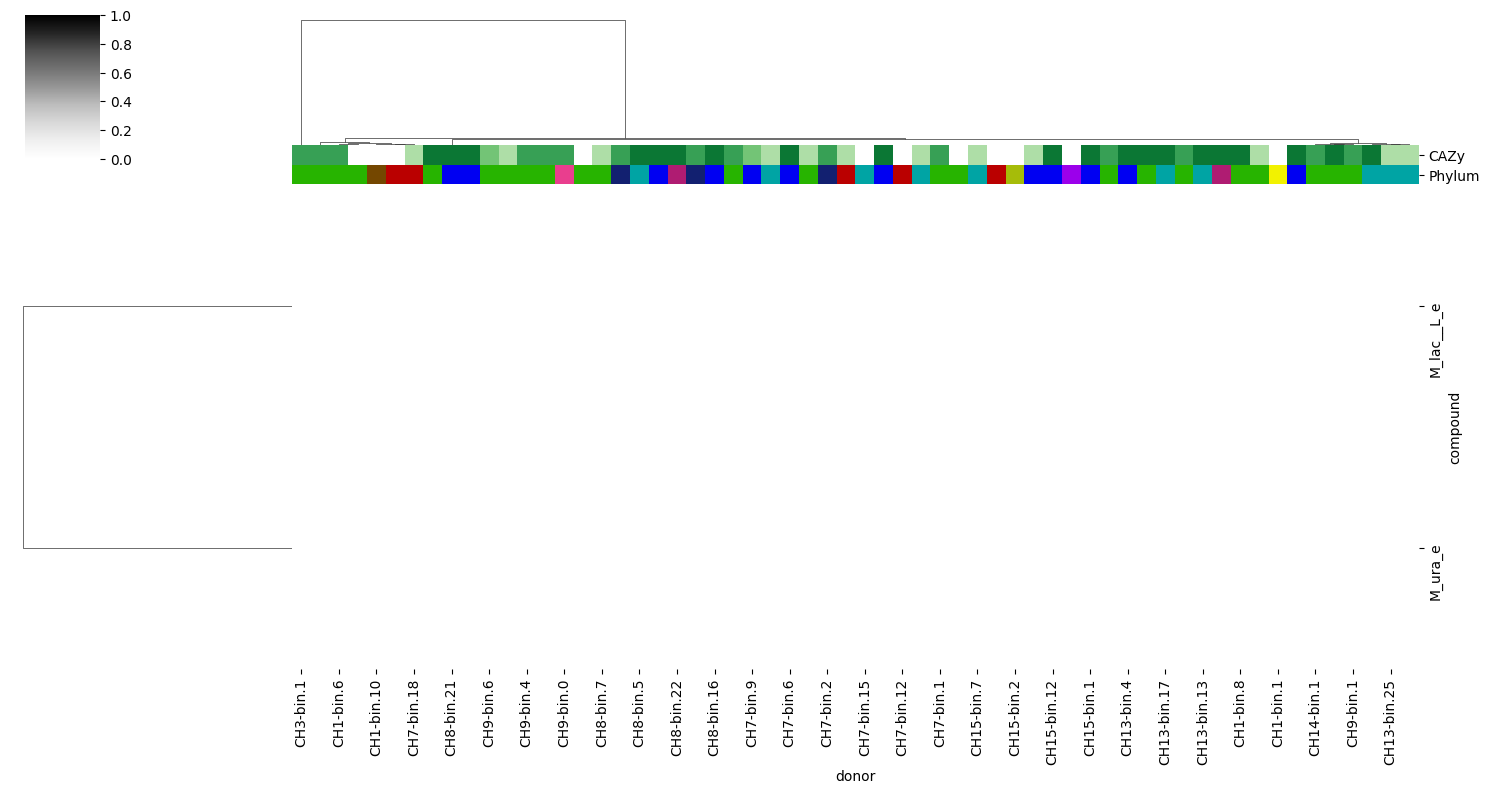

In [233]:

sns.clustermap(figsize=(15,8),data=steadiercom_donor.loc[["M_lac__L_e","M_ura_e"],~(steadiercom_donor.columns.isin(Desulfovibrionaceae_MAGs))],cmap="Greys",vmin=0,vmax=1, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

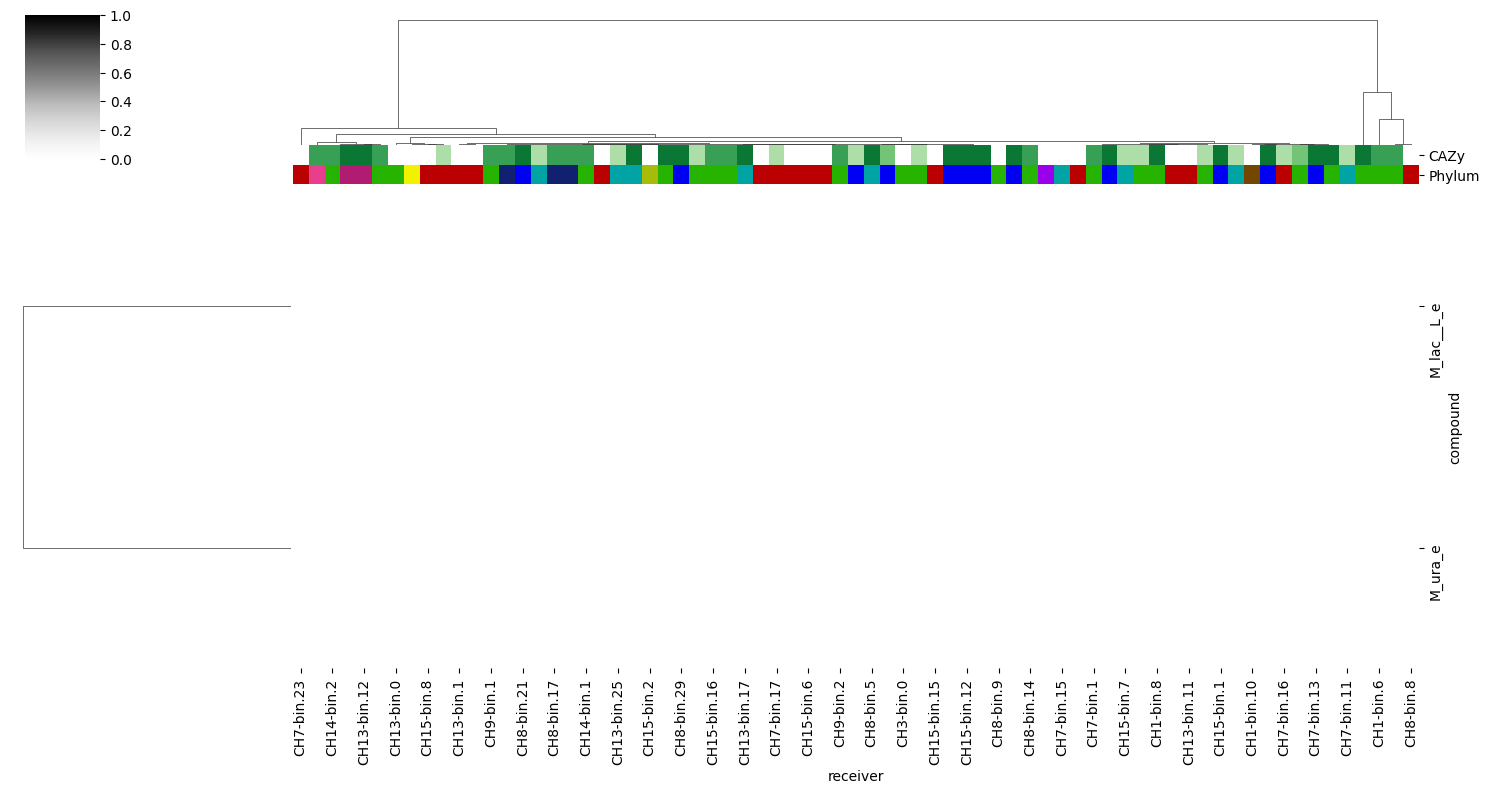

In [234]:

sns.clustermap(figsize=(15,8),data=steadiercom_receiver.loc[["M_lac__L_e","M_ura_e"]],cmap="Greys",vmin=0,vmax=1, method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

## 4. Lachnospiraceae thymine dependency in cellulose communities

In [235]:
Lachnospiraceae_cellulose_MAGs = all_mag_paper[(all_mag_paper["Family"]=="Lachnospiraceae") & (all_mag_paper.new_coverage>1) & (all_mag_paper.Substrate!="Xylan")].index


In [236]:
all_mag_paper[(all_mag_paper["Family"]=="Lachnospiraceae") & (all_mag_paper.new_coverage>1) & (all_mag_paper.Substrate!="Xylan")]

,Source,Substrate,Completeness (%),Contamination (%),Domain,Phylum,Class,Order,Family,Genus,Species,Genome size (bp),Scaffolds,N50,CDS prediction (DRAM),Column1,new_coverage
MAG,,,,,,,,,,,,,,,,,
CH15-bin.16,Compost_Digestate,PASC,99.37,2.22,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,NaN,5604339.0,23.0,423081.0,5254.0,CH15-bin.16,4.253342
CH1-bin.6,Marshland,PASC,99.37,1.90,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,Lacrimispora sp015057705,5692936.0,27.0,431665.0,5314.0,CH1-bin.6,45.242630
CH1-bin.8,Marshland,PASC,97.11,0.63,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,Lacrimispora celerecrescens_B,5085002.0,53.0,230023.0,4663.0,CH1-bin.8,3.871541
CH13-bin.14,Compost_Digestate,Avicel,99.37,1.58,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,Lacrimispora indolis,6707513.0,69.0,164111.0,6104.0,CH13-bin.14,9.628596
CH13-bin.2,Compost_Digestate,Avicel,98.30,2.01,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Mobilitalea,Mobilitalea sp014174405,3801925.0,177.0,37666.0,3385.0,CH13-bin.2,1.019666


### Auxotrophies

In [237]:
Lachnospiraceae_cellulose_auxo={}

lb_env = reframed.Environment.from_compounds(lb_db.compound.values)

for MAG in Lachnospiraceae_cellulose_MAGs:
    model = GEMs_dict[MAG]
    
    lb_env.apply(model,inplace=True,warning=False)
    specific_env = reframed.Environment.from_model(model)
    
    auxo = auxotrophy.auxotrophies(model,specific_env)
    
    Lachnospiraceae_cellulose_auxo[MAG]=auxo

In [238]:
summary_auxo = {}

for key,value in Lachnospiraceae_cellulose_auxo.items():
    summary_auxo[key]={}
    for rxn in value:
        summary_auxo[key][rxn]=1
summary_auxo_df = pd.DataFrame(summary_auxo).fillna(0)
summary_auxo_df.loc[~summary_auxo_df.index.isin(["R_EX_"+met+"_e" for met in m9_env_db.compound.values])]

,CH15-bin.16,CH1-bin.6,CH1-bin.8,CH13-bin.14,CH13-bin.2
R_EX_fol_e,1.0,1.0,0.0,0.0,0.0
R_EX_ura_e,1.0,1.0,0.0,1.0,0.0
R_EX_nac_e,0.0,1.0,1.0,1.0,1.0
R_EX_pnto__R_e,0.0,1.0,1.0,1.0,0.0
R_EX_ribflv_e,0.0,0.0,0.0,0.0,1.0


### Minimal medium solutions

In [239]:
Lachnospiraceae_cellulose_minimal_medium={}
n_solutions = 50

lb_env = reframed.Environment.from_compounds(media_db.compound.values)

for MAG in Lachnospiraceae_cellulose_MAGs:

    model = GEMs_dict[MAG].copy()
    all_ex_rxns = list(lb_env.keys())                     
    ex_rxns =  [ex_rxn for ex_rxn in all_ex_rxns if ex_rxn in model.reactions]

    min_medium = reframed.cobra.medium.minimal_medium(model=model,exchange_reactions=ex_rxns,use_pool=True,n_solutions=n_solutions)
    
    Lachnospiraceae_cellulose_minimal_medium[MAG]=min_medium

In [240]:
summary = {}
for key, value in Lachnospiraceae_cellulose_minimal_medium.items():
    
    solutions = value[0]
    summary[key]={}
    for solution in solutions:
        
        for element in solution:
            if element in summary[key].keys():
                summary[key][element] +=1
            else:
                summary[key][element] = 1

In [241]:
summary_df = pd.DataFrame(summary).fillna(0).apply(lambda x:x/n_solutions)

summary_df = summary_df.loc[~summary_df.index.isin(m9_env.keys())]#.sort_values(by="sum_all",ascending=False)

colrs_df = pd.concat([cazy_colors,phylum_colors],axis=1)

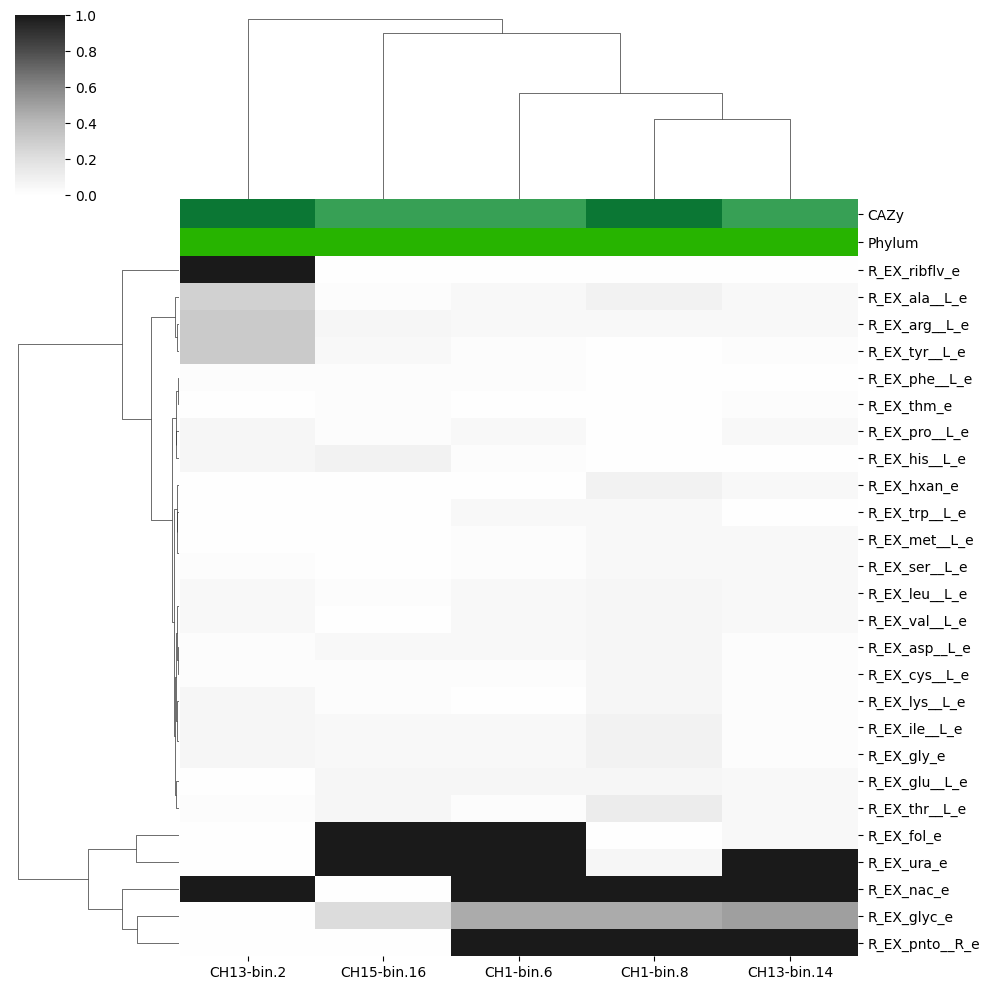

In [242]:
sns.clustermap(data=summary_df, cmap="RdGy",center=0,method="ward",metric="euclidean",col_colors=colrs_df,yticklabels=True)

In [243]:
summary_df.loc["R_EX_ura_e",["CH13-bin.2","CH15-bin.16","CH1-bin.6","CH1-bin.8", "CH13-bin.14"]]

CH13-bin.2     0.00
CH15-bin.16    1.00
CH1-bin.6      1.00
CH1-bin.8      0.06
CH13-bin.14    1.00
Name: R_EX_ura_e, dtype: float64

### Production of thym and ura from simple medium

In [244]:

for MAG in Lachnospiraceae_cellulose_MAGs:
    model = GEMs_dict[MAG].copy()
    
    m9_env.apply(model,inplace=True,warning=False)
    specific_env = reframed.Environment.from_model(model)
    print(MAG)
    print(reframed.FBA(model,constraints=specific_env,objective={"R_EX_thym_e":1,"R_Growth":0}))

CH15-bin.16
Objective: -0.0
Status: Optimal

CH1-bin.6
Objective: -0.0
Status: Optimal

CH1-bin.8
Objective: 2.7777777777777675
Status: Optimal

CH13-bin.14
Objective: -0.0
Status: Optimal

CH13-bin.2
Objective: 1.0752688172043015
Status: Optimal



In [245]:
m9_env = reframed.Environment.from_compounds(m9_env_db.compound.values)

for MAG in Lachnospiraceae_cellulose_MAGs:
    model = GEMs_dict[MAG].copy()
    
    m9_env.apply(model,inplace=True,warning=False)
    specific_env = reframed.Environment.from_model(model)
    print(MAG)
    print(reframed.FBA(model,constraints=specific_env,objective={"R_EX_ura_e":1,"R_Growth":0}))

CH15-bin.16
Objective: -0.0
Status: Optimal

CH1-bin.6
Objective: -0.0
Status: Optimal

CH1-bin.8
Objective: 3.162555344718536
Status: Optimal

CH13-bin.14
Objective: -0.0
Status: Optimal

CH13-bin.2
Objective: 1.1342155009451798
Status: Optimal



## CD_X community

In [246]:
all_mag_paper[(all_mag_paper.Source=="Compost_Digestate")&(all_mag_paper.Substrate=="Xylan")][["Phylum","Class","Order","Family","Genus","Species","new_coverage"]]

,Phylum,Class,Order,Family,Genus,Species,new_coverage
MAG,,,,,,,
CH14-bin.1,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,Lacrimispora amygdalina_A,54.707294
CH14-bin.2,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Robinsoniella,Robinsoniella peoriensis,18.831114
CH14-bin.4,Desulfobacterota,Desulfovibrionia,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,Desulfovibrio legallii,2.741818


**Cross feeding**

In [247]:
steadier_sample_cross[(steadier_sample_cross.donor=="CH14-bin.4")&(steadier_sample_cross.frequency>0.1)].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
108,CH14-bin.4,CH14-bin.1,M_etoh_e,0.000483,0.010483,0.12,CD_X,SC1_X,0.000058
210,CH14-bin.4,CH14-bin.2,M_co2_e,0.000044,0.000999,0.67,CD_X,SC1_X,0.000029
288,CH14-bin.4,CH14-bin.2,M_h2s_e,0.000002,0.000048,0.72,CD_X,SC1_X,0.000001


In [248]:
steadier_sample_cross[(steadier_sample_cross.donor=="CH14-bin.2")&(steadier_sample_cross.frequency>0.1)].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
41,CH14-bin.2,CH14-bin.1,M_acald_e,0.003791,0.086058,0.11,CD_X,SC1_X,0.000417
96,CH14-bin.2,CH14-bin.4,M_xyl__D_e,0.000697,0.004639,0.24,CD_X,SC1_X,0.000167
89,CH14-bin.2,CH14-bin.4,M_acald_e,0.000794,0.018026,0.11,CD_X,SC1_X,0.000087
229,CH14-bin.2,CH14-bin.4,M_mal__L_e,0.000024,0.000183,0.62,CD_X,SC1_X,0.000015


In [249]:
steadier_sample_cross[(steadier_sample_cross.donor=="CH14-bin.1")&(steadier_sample_cross.frequency>0.1)].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
53,CH14-bin.1,CH14-bin.2,M_co2_e,2.365083e-03,0.053740,0.67,CD_X,SC1_X,1.584606e-03
35,CH14-bin.1,CH14-bin.2,M_acald_e,4.907246e-03,0.111396,0.23,CD_X,SC1_X,1.128667e-03
32,CH14-bin.1,CH14-bin.2,M_xyl__D_e,5.041495e-03,0.033581,0.21,CD_X,SC1_X,1.058714e-03
90,CH14-bin.1,CH14-bin.2,M_asp__D_e,7.905396e-04,0.005985,0.96,CD_X,SC1_X,7.589180e-04
187,CH14-bin.1,CH14-bin.2,M_ura_e,8.143955e-05,0.000727,1.00,CD_X,SC1_X,8.143955e-05
188,CH14-bin.1,CH14-bin.2,M_gua_e,8.039167e-05,0.000532,1.00,CD_X,SC1_X,8.039167e-05
249,CH14-bin.1,CH14-bin.2,M_h2s_e,1.066834e-05,0.000313,0.87,CD_X,SC1_X,9.281460e-06
87,CH14-bin.1,CH14-bin.4,M_xyl__D_e,8.256062e-04,0.005499,0.65,CD_X,SC1_X,5.366440e-04
95,CH14-bin.1,CH14-bin.4,M_acald_e,7.323811e-04,0.016625,0.66,CD_X,SC1_X,4.833715e-04
141,CH14-bin.1,CH14-bin.4,M_rib__D_e,3.050128e-04,0.002032,0.53,CD_X,SC1_X,1.616568e-04


**Production**

In [250]:
steadier_sample[(steadier_sample.donor=="CH14-bin.4")&(steadier_sample.receiver=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
82,CH14-bin.4,environment,M_ac_e,0.000887,0.015017,1.00,CD_X,SC1_X,8.866423e-04
147,CH14-bin.4,environment,M_co2_e,0.000273,0.006198,1.00,CD_X,SC1_X,2.727925e-04
105,CH14-bin.4,environment,M_etoh_e,0.000506,0.010977,0.27,CD_X,SC1_X,1.365374e-04
162,CH14-bin.4,environment,M_for_e,0.000180,0.004001,0.43,CD_X,SC1_X,7.745564e-05
200,CH14-bin.4,environment,M_h2s_e,0.000054,0.001571,0.78,CD_X,SC1_X,4.175201e-05
222,CH14-bin.4,environment,M_h2_e,0.000030,0.014884,0.67,CD_X,SC1_X,2.010224e-05
220,CH14-bin.4,environment,M_succ_e,0.000031,0.000265,0.52,CD_X,SC1_X,1.598112e-05
291,CH14-bin.4,environment,M_meoh_e,0.000001,0.000043,0.43,CD_X,SC1_X,5.860516e-07


In [251]:
steadier_sample[(steadier_sample.donor=="CH14-bin.2")&(steadier_sample.receiver=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
28,CH14-bin.2,environment,M_ac_e,0.006104,0.103387,1.00,CD_X,SC1_X,0.006104
42,CH14-bin.2,environment,M_co_e,0.003384,0.120816,0.93,CD_X,SC1_X,0.003147
99,CH14-bin.2,environment,M_co2_e,0.000632,0.014366,0.17,CD_X,SC1_X,0.000107


In [252]:
steadier_sample[(steadier_sample.donor=="CH14-bin.1")&(steadier_sample.receiver=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
10,CH14-bin.1,environment,M_ac_e,0.017823,0.301855,1.00,CD_X,SC1_X,0.017823
14,CH14-bin.1,environment,M_co2_e,0.014042,0.319064,1.00,CD_X,SC1_X,0.014042
6,CH14-bin.1,environment,M_xyl__D_e,0.023712,0.157942,0.24,CD_X,SC1_X,0.005691
31,CH14-bin.1,environment,M_etoh_e,0.005513,0.119663,0.22,CD_X,SC1_X,0.001213
81,CH14-bin.1,environment,M_h2_e,0.000914,0.453235,0.97,CD_X,SC1_X,0.000886
91,CH14-bin.1,environment,M_thm_e,0.000781,0.002942,1.00,CD_X,SC1_X,0.000781
98,CH14-bin.1,environment,M_h2s_e,0.000639,0.018737,0.93,CD_X,SC1_X,0.000594
132,CH14-bin.1,environment,M_4hba_e,0.000365,0.002944,1.00,CD_X,SC1_X,0.000365
164,CH14-bin.1,environment,M_gcald_e,0.000177,0.002948,1.00,CD_X,SC1_X,0.000177


**Consuming**

In [253]:
steadier_sample[(steadier_sample.receiver=="CH14-bin.4")&(steadier_sample.donor=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
271,environment,CH14-bin.4,M_cys__L_e,0.000004,0.000029,1.00,CD_X,SC1_X,0.000004
286,environment,CH14-bin.4,M_pydxn_e,0.000002,0.000010,0.98,CD_X,SC1_X,0.000002


In [254]:
steadier_sample[(steadier_sample.receiver=="CH14-bin.2")&(steadier_sample.donor=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
20,environment,CH14-bin.2,M_xylan4_e,1.041506e-02,0.014434,0.95,CD_X,SC1_X,9.894305e-03
206,environment,CH14-bin.2,M_cys__L_e,4.594434e-05,0.000379,0.98,CD_X,SC1_X,4.502545e-05
311,environment,CH14-bin.2,M_fol_e,6.458346e-07,0.000001,1.00,CD_X,SC1_X,6.458346e-07
284,environment,CH14-bin.2,M_ascb__L_e,1.761238e-06,0.000010,0.36,CD_X,SC1_X,6.340457e-07
312,environment,CH14-bin.2,M_nac_e,6.111222e-07,0.000005,1.00,CD_X,SC1_X,6.111222e-07
322,environment,CH14-bin.2,M_pnto__R_e,2.761747e-07,0.000001,1.00,CD_X,SC1_X,2.761747e-07


In [255]:
steadier_sample[(steadier_sample.receiver=="CH14-bin.1")&(steadier_sample.donor=="environment")].sort_values(["receiver","mass_rate*frequency"],ascending=[True,False])

,donor,receiver,compound,mass_rate,rate,frequency,community,medium,mass_rate*frequency
5,environment,CH14-bin.1,M_xylan4_e,4.371268e-02,0.060578,1.00,CD_X,SC1_X,4.371268e-02
25,environment,CH14-bin.1,M_xylan8_e,8.237433e-03,0.005780,0.16,CD_X,SC1_X,1.317989e-03
80,environment,CH14-bin.1,M_cys__L_e,9.424689e-04,0.007779,1.00,CD_X,SC1_X,9.424689e-04
279,environment,CH14-bin.1,M_nac_e,1.775404e-06,0.000015,1.00,CD_X,SC1_X,1.775404e-06
308,environment,CH14-bin.1,M_pnto__R_e,8.023300e-07,0.000004,1.00,CD_X,SC1_X,8.023300e-07
